## **Introduction**
In the first version of the project, I like to do exploratory data analysis. This is where I analyze the data in detail to understand the independent variables and how they relate to one another. This version does not involve any modelling. It is mostly for exploratory data analysis. 

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
#pd.set_option('display.max_rows', None)  # Show all rows

In [2]:
#Get the dataset
dataset = pd.read_csv('loan.csv')
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Analysis
There are columns that have missing values. The total values should be 614. 
Gender, Married, dependents, self-employed, LoanAmount, LoanAmountTerm, and Credit_History all feaure missing values. 
This is important information to have.

## Way Forward
From here, the way forward is to analyze each column and determine its impact on the loan status. The first column is the gender. Does this have an impact on the person's ability to pay a loan?

In [5]:
# Check missing values which can affect the analysis by skewing the data
print(dataset['Gender'].isnull().sum())

13


In [6]:
# With the missing values and the data being categorical, I will use mode to fill in the missing data instead of dropping them.  
# The missing data is also less than 20%
dataset['Gender'] = dataset['Gender'].fillna(dataset['Gender'].mode()[0])

In [7]:
pd.crosstab(dataset['Gender'], dataset['Loan_Status'], margins = True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


Gender
Female    0.669643
Male      0.691235
Name: Loan_Status, dtype: float64


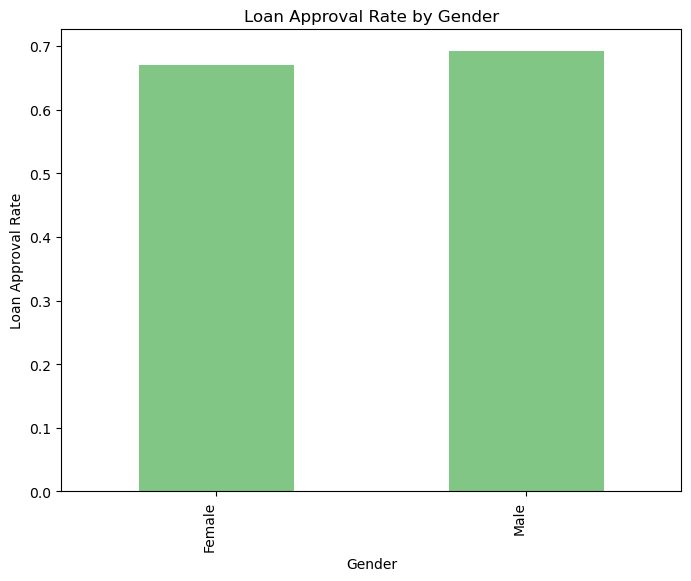

In [8]:
#Change the Loan_Status to numeric values
dataset['Loan_Status'] = dataset['Loan_Status'].map({'Y': 1, 'N': 0})
# Visual representation of how each gender pays their loans
loan_approval_rate = dataset.groupby('Gender')['Loan_Status'].mean()
print(loan_approval_rate)
# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
loan_approval_rate.plot(kind='bar', color=['#4CAF50'], alpha=0.7)
plt.title('Loan Approval Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Loan Approval Rate')
# Adjust x-axis labels
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate and align labels for better readability

plt.show()

## Analysis
The loan approval rate is almost the same based on gender. There is really no difference. This means that gender is not a factor when it comes to loan approval. This means that this is not a variable to consider as the bank is gender neutral and does not consider gender when giving out loans. I also want to check using Chi-Square the p-value and whether it has any impact on the significance level. 

In [9]:
# Create a contingency table
contingency_table = pd.crosstab(dataset['Gender'], dataset['Loan_Status'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}, P-value: {p_value}")

Chi2 Statistic: 0.11087854691241235, P-value: 0.7391461310869638


## Conclusion
The p-value is significantly greater than the significance level (0.05). This means that the relationship between gender and loan approval is not statistically significant. 

# Married Column
I want to now check what impact being married has on the person's ability to get a loan. 

In [10]:
#First, we check if there are missing values that can make data analysis difficult
print(dataset['Married'].isnull().sum())

3


In [11]:
# I Use mode to fill the missing values as they are not many
dataset['Married'] = dataset['Married'].fillna(dataset['Married'].mode()[0])

In [12]:
pd.crosstab(dataset['Married'], dataset['Loan_Status'], margins = True)

Loan_Status,0,1,All
Married,,,
No,79,134,213
Yes,113,288,401
All,192,422,614


Married
No     0.629108
Yes    0.718204
Name: Loan_Status, dtype: float64


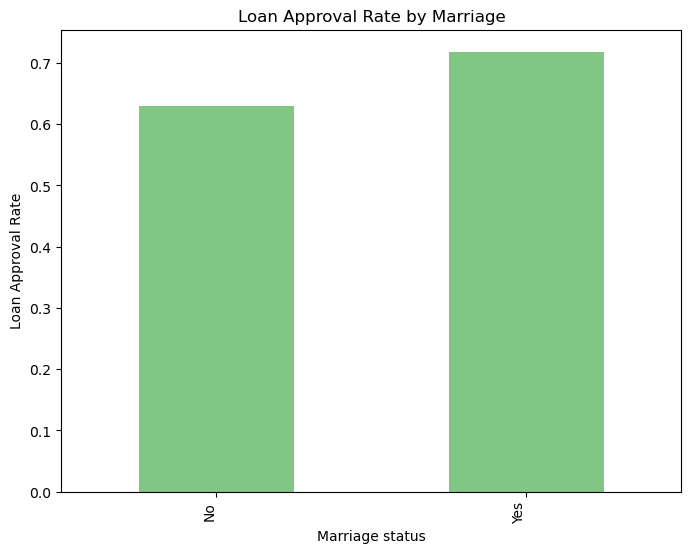

In [13]:
#Change the Loan_Status to numeric values
# Visual representation of how being married can impact loan approval
loan_approval_rate = dataset.groupby('Married')['Loan_Status'].mean()
print(loan_approval_rate)
# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
loan_approval_rate.plot(kind='bar', color=['#4CAF50'], alpha=0.7)
plt.title('Loan Approval Rate by Marriage')
plt.xlabel('Marriage status')
plt.ylabel('Loan Approval Rate')
# Adjust x-axis labels
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate and align labels for better readability

plt.show()

## Analysis
The difference between those that a married and those that are not for getting loans is around 8.9%, with being married proving to be an advantage in getting loan approval. However, I feel this is not enough to determine relation. I want to check for statistical significance using Chi-Square and p-value to understand the relation. 

In [14]:
# Create a contingency table
contingency_table = pd.crosstab(dataset['Married'], dataset['Loan_Status'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}, P-value: {p_value}")

Chi2 Statistic: 4.73187557933362, P-value: 0.029608580862582116


## Conclusion on Married
The p-value is less than the significant level. 
This suggests that the relationship between being married and loan approval is significant. This means that it might be a factor when giving loans. However, there is one more thing I would like to check. I would like to check how it correlates with other variables. 
This is something I will do once I have thinned down the variables I intend on using. 

# Dependents Column
For the dependents column, I want to try and get two new relations to see which one is significant. 
I noticed when reviewing the dataset that aside from having missing values, the data features only four values: 0, 1, 2, 3+. 
With this, I can create two different columns. 
The first will be the has_dependents variable, which will check for the presence of dependents. 
The second will be the has many dependents, which will feature the people with 3 or more dependents. 
This will better allow me to analyze the relations between both and understand their significance. 

In [15]:
print(dataset['Gender'].isnull().sum())

0


In [16]:
#Fill Missing Values
# Because it is still categorical values, I will be using mode still. 
dataset['Dependents'] = dataset['Dependents'].fillna(dataset['Dependents'].mode()[0])

In [17]:
# Creating the Has Dependents Column
has_dependents = []
value = 0
for data in dataset['Dependents']:
    if data == "3+":
        value = 1
    elif int(data)>0:
        value = 1
    else:
        value = 0
    has_dependents.append(value)
    
dataset['Has_Dependents'] = has_dependents


In [18]:
# Creating the Many Dependents Column
many_dependents = []
value = 0
for data in dataset['Dependents']:
    if data == "3+":
        value = 1
    else:
        value = 0
    many_dependents.append(value)
    
dataset['many_Dependents'] = many_dependents


# Followup
With both of these colums, I can advance to check whether either of them affects someone's ability to get a loan. 

Has_Dependents
0    0.686111
1    0.688976
Name: Loan_Status, dtype: float64


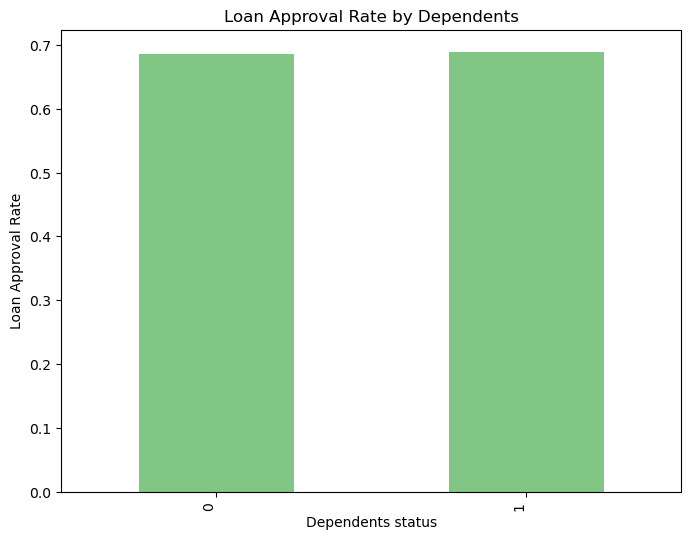

In [19]:
#Change the Loan_Status to numeric values
# Visual representation of how being married can impact loan approval
loan_approval_rate = dataset.groupby('Has_Dependents')['Loan_Status'].mean()
print(loan_approval_rate)
# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
loan_approval_rate.plot(kind='bar', color=['#4CAF50'], alpha=0.7)
plt.title('Loan Approval Rate by Dependents')
plt.xlabel('Dependents status')
plt.ylabel('Loan Approval Rate')
# Adjust x-axis labels
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate and align labels for better readability

plt.show()

# Analysis
From this, it seems as though there is little difference between having a dependent and getting a loan. 
The next step is to check the p-value to determine whether it is less than the significance level. 

In [20]:
# Create a contingency table
contingency_table = pd.crosstab(dataset['Has_Dependents'], dataset['Loan_Status'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}, P-value: {p_value}")

Chi2 Statistic: 0.0, P-value: 1.0


In [21]:
print(dataset['Has_Dependents'].value_counts())
print(dataset['Loan_Status'].value_counts())

Has_Dependents
0    360
1    254
Name: count, dtype: int64
Loan_Status
1    422
0    192
Name: count, dtype: int64


# Analysis
The high p_value can mean one of two things. 
1. The data is corrupted.
2. There is absolutely no relationship between the two variables. 

In this case, I would argue for the latter. This is because I reviewed the data row by row and I saw several differences. This means that there is absolutely no relationship between the fact that the person has dependents to them getting a loan. However, it would be interesting to determine whether the number of dependents has an impact, particularly if they are more than three. 

many_Dependents
0    0.690941
1    0.647059
Name: Loan_Status, dtype: float64


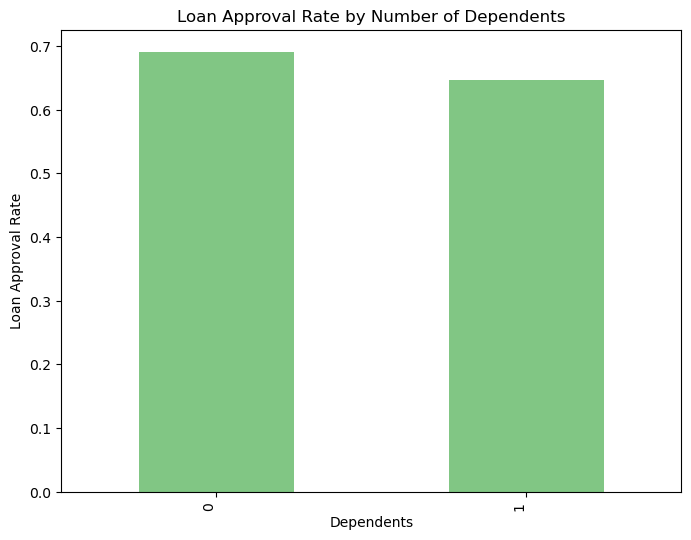

In [22]:
# Checking if many dependents affects the data
#Change the Loan_Status to numeric values

loan_approval_rate = dataset.groupby('many_Dependents')['Loan_Status'].mean()
print(loan_approval_rate)
# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
loan_approval_rate.plot(kind='bar', color=['#4CAF50'], alpha=0.7)
plt.title('Loan Approval Rate by Number of Dependents')
plt.xlabel('Dependents')
plt.ylabel('Loan Approval Rate')
# Adjust x-axis labels
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate and align labels for better readability

plt.show()

In [23]:
# Create a contingency table
contingency_table = pd.crosstab(dataset['many_Dependents'], dataset['Loan_Status'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}, P-value: {p_value}")

Chi2 Statistic: 0.23969662650260687, P-value: 0.624425312972677


## Analysis
While at first it looked as though having dependents had an impact, upon analysis, it is proven that having dependents is not a factor that can be considered when giving out loans. 


## The education Variable
The next variable to analyze is the education variable. 
The steps are:
1. Fill the missing values. 
2. Graphically represent the information. 
3. Find the p-value and establish whether the variables are connected. 

In [24]:
print(dataset['Education'].isnull().sum())
# This column has no missing values

0


In [25]:
#Change the Education to numeric values
dataset['Education'] = dataset['Education'].map({'Graduate': 1, 'Not Graduate': 0})
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Has_Dependents,many_Dependents
0,LP001002,Male,No,0,1,No,5849,0.0,NaN,360.0,1.0,Urban,1,0,0
1,LP001003,Male,Yes,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,0,1,0
2,LP001005,Male,Yes,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,0,0
3,LP001006,Male,Yes,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,1,0,0
4,LP001008,Male,No,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,1,No,2900,0.0,71.0,360.0,1.0,Rural,1,0,0
610,LP002979,Male,Yes,3+,1,No,4106,0.0,40.0,180.0,1.0,Rural,1,1,1
611,LP002983,Male,Yes,1,1,No,8072,240.0,253.0,360.0,1.0,Urban,1,1,0
612,LP002984,Male,Yes,2,1,No,7583,0.0,187.0,360.0,1.0,Urban,1,1,0


Education
0    0.611940
1    0.708333
Name: Loan_Status, dtype: float64


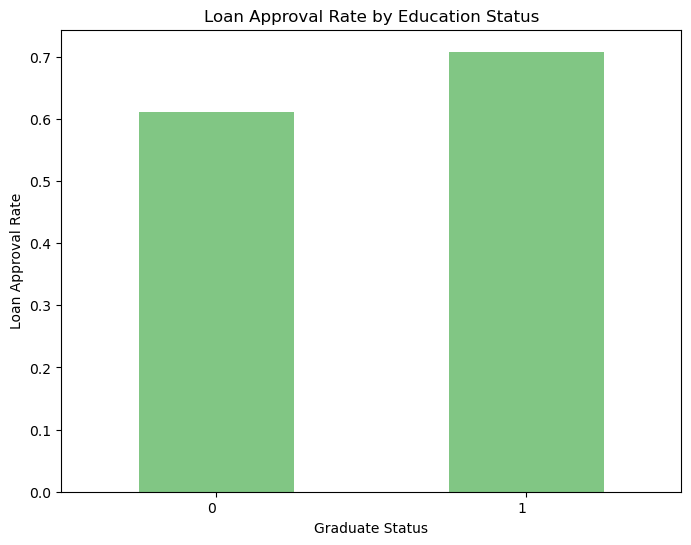

In [26]:
# # Visual representation of how each education pays their loans
loan_approval_rate = dataset.groupby('Education')['Loan_Status'].mean()
print(loan_approval_rate)
# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
loan_approval_rate.plot(kind='bar', color=['#4CAF50'], alpha=0.7)
plt.title('Loan Approval Rate by Education Status')
plt.xlabel('Graduate Status')
plt.ylabel('Loan Approval Rate')
# Adjust x-axis labels
plt.xticks(rotation=0, ha='right', fontsize=10)  # Rotate and align labels for better readability

plt.show()

# Analysis
There is roughly a 9% difference between the application of graduates than those who are not. This shows that graduates may have a higher chance of getting loans when compared to nongraduates. 

In [27]:
# Create a contingency table
contingency_table = pd.crosstab(dataset['Education'], dataset['Loan_Status'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}, P-value: {p_value}")

Chi2 Statistic: 4.091490413303622, P-value: 0.04309962129357353


# Analysis
The P-value also shows a relationship between both variables. This means that education status is a factor that is considered when giving loans. This is a variable that should make the model function better. 

The next one is self_employed. 

In [28]:
# The self employed column has missing values. I will use mode due to the categorical nature of the data 
# The missing data is also less than 20%
dataset['Self_Employed'] = dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0])

In [29]:
dataset['Self_Employed'] = dataset['Self_Employed'].map({'Yes': 1, 'No': 0})
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Has_Dependents,many_Dependents
0,LP001002,Male,No,0,1,0,5849,0.0,NaN,360.0,1.0,Urban,1,0,0
1,LP001003,Male,Yes,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0,1,0
2,LP001005,Male,Yes,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1,0,0
3,LP001006,Male,Yes,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1,0,0
4,LP001008,Male,No,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1,0,0
610,LP002979,Male,Yes,3+,1,0,4106,0.0,40.0,180.0,1.0,Rural,1,1,1
611,LP002983,Male,Yes,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,1,1,0
612,LP002984,Male,Yes,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,1,1,0


Self_Employed
0    0.687970
1    0.682927
Name: Loan_Status, dtype: float64


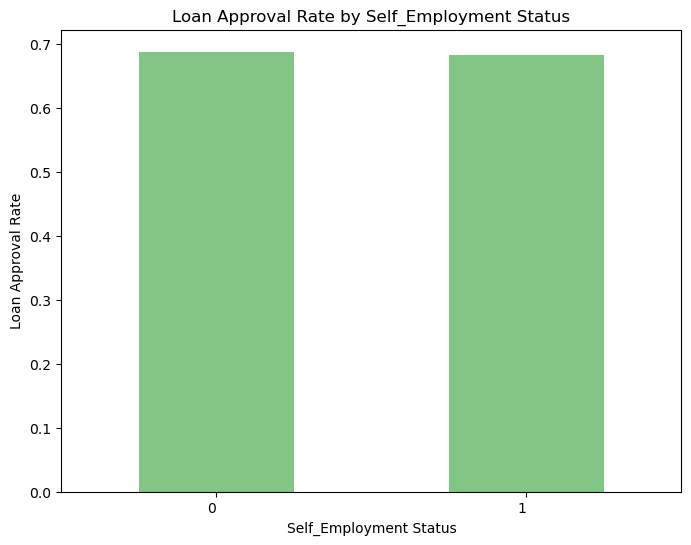

In [30]:
# # Visual representation of how whether someone is self-employed pays their loans
loan_approval_rate = dataset.groupby('Self_Employed')['Loan_Status'].mean()
print(loan_approval_rate)
# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
loan_approval_rate.plot(kind='bar', color=['#4CAF50'], alpha=0.7)
plt.title('Loan Approval Rate by Self_Employment Status')
plt.xlabel('Self_Employment Status')
plt.ylabel('Loan Approval Rate')
# Adjust x-axis labels
plt.xticks(rotation=0, ha='right', fontsize=10)  # Rotate and align labels for better readability

plt.show()

# Analysis
The difference is very minimal. 
However, using common knowledge, it would be challenging to track someone who is self-employed, which can present a challenge in debt collection. 
I need to further investigate this. 

In [31]:
pd.crosstab(dataset['Self_Employed'], dataset['Loan_Status'], margins = True)

Loan_Status,0,1,All
Self_Employed,,,
0,166,366,532
1,26,56,82
All,192,422,614


In [32]:
# Create a contingency table
contingency_table = pd.crosstab(dataset['Self_Employed'], dataset['Loan_Status'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()  # Total sample size
cramer_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
print(f"Cramér's V: {cramer_v}")
print(f"Chi2 Statistic: {chi2}, P-value: {p_value}")

Cramér's V: 0.0
Chi2 Statistic: 0.0, P-value: 1.0


In [33]:
print(dataset['Self_Employed'].value_counts())
print(dataset['Loan_Status'].value_counts())


Self_Employed
0    532
1     82
Name: count, dtype: int64
Loan_Status
1    422
0    192
Name: count, dtype: int64


## Analysis
As it stands, there seems to be no relation between being self-employed and loan status. 
I even went ahead to loof for another assessment to determine whether the two had a relation but in truth, there seems to be none. 
It is also important to note that those that are self-employed represent a significantly small percentage of the data (15.4%). This can make it significantly hard to establish a relevant connection between self-employment and loan probability. This means that placing this variable would simply confuse the model, making it think that being self-employed is a bad thing in taking loans. 

## Applicant Income
I want to start analyzing the relation between client income and getting the loan approved. 
The applicant income is a numeric value, which presents a few complexities. They are:
1. How do I fill in the missing data? Should I use mean or median? How is the spread and how does it affect the values being replaced?
2. How skewed is the data and how does this affect data analysis?
3. How do I establish the relationship with the dependent variable?

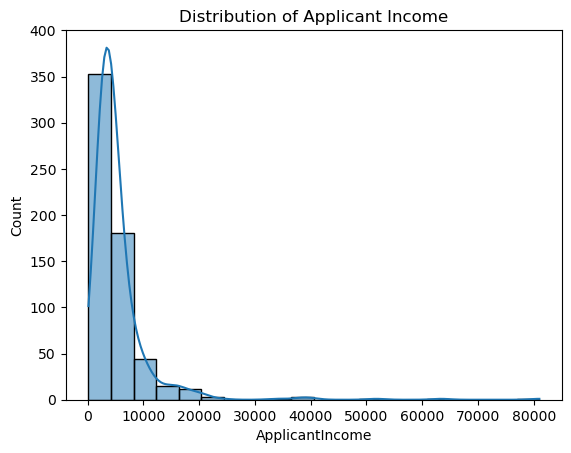

In [34]:
# First, check the spread
sns.histplot(dataset['ApplicantIncome'], bins=20, kde=True)
plt.title('Distribution of Applicant Income')
plt.show()

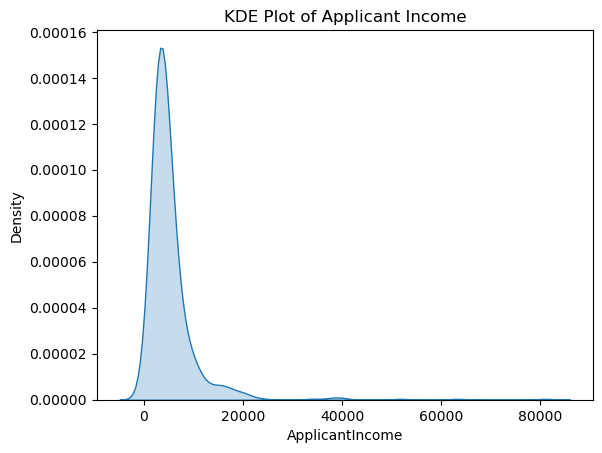

In [35]:
sns.kdeplot(dataset['ApplicantIncome'], fill=True)  # Smooth density curve
plt.title('KDE Plot of Applicant Income')
plt.show()

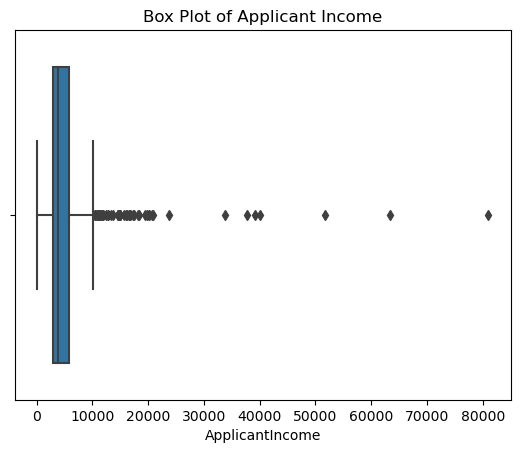

In [36]:
sns.boxplot(x=dataset['ApplicantIncome'])
plt.title('Box Plot of Applicant Income')
plt.show()


In [37]:
median_value = dataset['ApplicantIncome'].median()
print(f"Median: {median_value}")


Median: 3812.5


## Analysis
The data is very skewed to the right. 
This brings forth a few conclusions:
1. There are a lot of people who earn between 0 and 100,000. 
2. There are a lot of outliers. The boxplot shows that there are very many outliers (Represented by the dots). 
3. Due to the skewed nature of the data, using a statistical test that assumes normality can be a challenge. 

I also want to confirm whether the outliers are correctly inserted. 

In [38]:
#Checking the Outliers
# Calculate Q1, Q3, and IQR
Q1 = dataset['ApplicantIncome'].quantile(0.25)
Q3 = dataset['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR
print("Upper bound:", upper_bound)
# Filter and display outlier values
outliers = dataset[dataset['ApplicantIncome'] > upper_bound]
print("Number of Outliers:", len(outliers))
outliers

Upper bound: 10171.25
Number of Outliers: 50


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Has_Dependents,many_Dependents
9,LP001020,Male,Yes,1,1,0,12841,10968.0,349.0,360.0,1.0,Semiurban,0,1,0
34,LP001100,Male,No,3+,1,0,12500,3000.0,320.0,360.0,1.0,Rural,0,1,1
54,LP001186,Female,Yes,1,1,1,11500,0.0,286.0,360.0,0.0,Urban,0,1,0
67,LP001233,Male,Yes,1,1,0,10750,0.0,312.0,360.0,1.0,Urban,1,1,0
102,LP001350,Male,Yes,0,1,0,13650,0.0,NaN,360.0,1.0,Urban,1,0,0
106,LP001369,Male,Yes,2,1,0,11417,1126.0,225.0,360.0,1.0,Urban,1,1,0
115,LP001401,Male,Yes,1,1,0,14583,0.0,185.0,180.0,1.0,Rural,1,1,0
119,LP001422,Female,No,0,1,0,10408,0.0,259.0,360.0,1.0,Urban,1,0,0
126,LP001448,Male,Yes,3+,1,0,23803,0.0,370.0,360.0,1.0,Rural,1,1,1
128,LP001451,Male,Yes,1,1,1,10513,3850.0,160.0,180.0,0.0,Urban,0,1,0


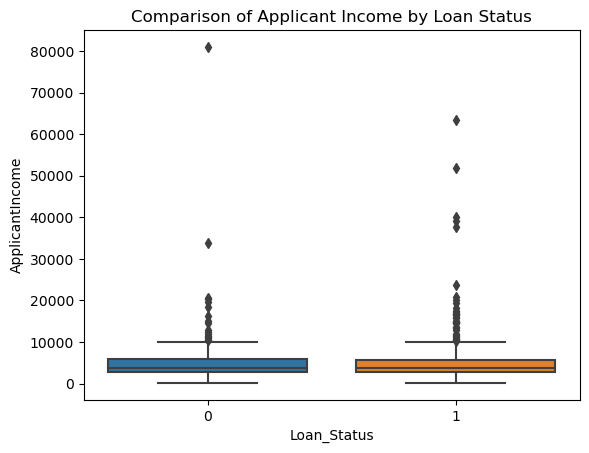

In [39]:
#Boxplot on Income and Loan Status
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=dataset)
plt.title('Comparison of Applicant Income by Loan Status')
plt.show()


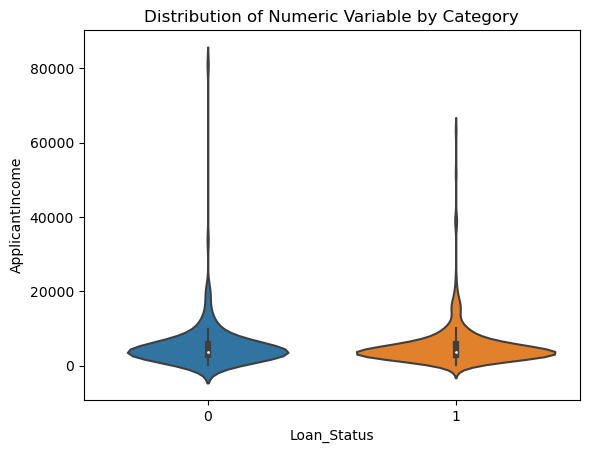

In [40]:
#Boxplot on Income and Loan Status
sns.violinplot(x='Loan_Status', y='ApplicantIncome', data=dataset)
plt.title('Distribution of Numeric Variable by Category')
plt.show()


# Conclusion
The outliers are impactful. They should be considered. They need to be there. However, I should seek to standardize the data for efficiency and so that it does not confuse the algorithm during modeling. 
It is also important to note that the rate on aplication acceptance is very similar. Further analysis will give more insights. 


In [41]:
#Standardizing Applicant Income
dataset['ApplicantIncome_log'] = np.log1p(dataset['ApplicantIncome'])
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Has_Dependents,many_Dependents,ApplicantIncome_log
0,LP001002,Male,No,0,1,0,5849,0.0,NaN,360.0,1.0,Urban,1,0,0,8.674197
1,LP001003,Male,Yes,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0,1,0,8.430327
2,LP001005,Male,Yes,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1,0,0,8.006701
3,LP001006,Male,Yes,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1,0,0,7.857094
4,LP001008,Male,No,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1,0,0,8.699681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1,0,0,7.972811
610,LP002979,Male,Yes,3+,1,0,4106,0.0,40.0,180.0,1.0,Rural,1,1,1,8.320448
611,LP002983,Male,Yes,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,1,1,0,8.996280
612,LP002984,Male,Yes,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,1,1,0,8.933796


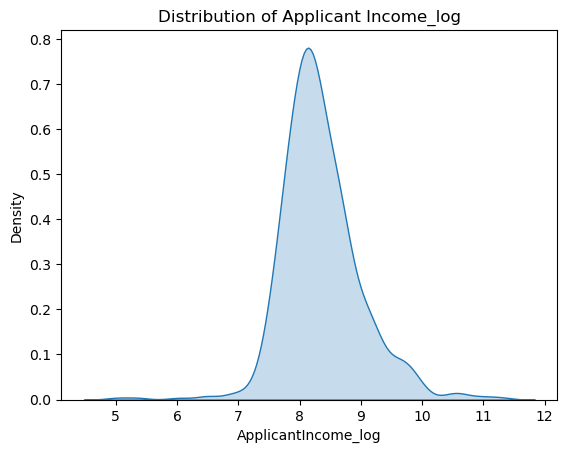

In [42]:
sns.kdeplot(dataset['ApplicantIncome_log'], fill=True)
plt.title('Distribution of Applicant Income_log')
plt.show()

In [43]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
dataset['Applicant_Income_normalized'] = scaler.fit_transform(dataset[['ApplicantIncome']])
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Has_Dependents,many_Dependents,ApplicantIncome_log,Applicant_Income_normalized
0,LP001002,Male,No,0,1,0,5849,0.0,NaN,360.0,1.0,Urban,1,0,0,8.674197,0.070489
1,LP001003,Male,Yes,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0,1,0,8.430327,0.054830
2,LP001005,Male,Yes,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1,0,0,8.006701,0.035250
3,LP001006,Male,Yes,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1,0,0,7.857094,0.030093
4,LP001008,Male,No,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1,0,0,8.699681,0.072356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1,0,0,7.972811,0.034014
610,LP002979,Male,Yes,3+,1,0,4106,0.0,40.0,180.0,1.0,Rural,1,1,1,8.320448,0.048930
611,LP002983,Male,Yes,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,1,1,0,8.996280,0.097984
612,LP002984,Male,Yes,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,1,1,0,8.933796,0.091936


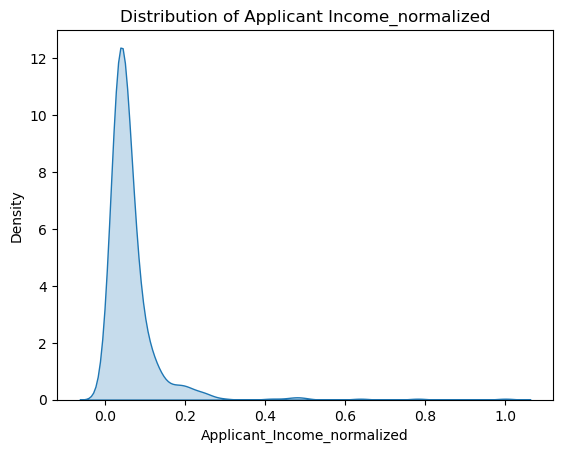

In [44]:
sns.kdeplot(dataset['Applicant_Income_normalized'], fill=True)
plt.title('Distribution of Applicant Income_normalized')
plt.show()

# Analysis
The data is not skewed to the right anymore when I standardize versus when I normalize.
I would prefer to use standardized data over normalized data then. 

In [45]:
#Test for statistical Significance
from scipy.stats import ttest_ind

group1 = dataset[dataset['Loan_Status'] == 0]['ApplicantIncome_log']
group2 = dataset[dataset['Loan_Status'] == 1]['ApplicantIncome_log']

t_stat, p_value = ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -0.2711160675944122, P-value: 0.7863931822233743


In [46]:
from scipy.stats import f_oneway

categories = dataset['Loan_Status'].unique()
data_groups = [dataset[dataset['Loan_Status'] == cat]['ApplicantIncome_log'] for cat in categories]

f_stat, p_value = f_oneway(*data_groups)
print(f"F-statistic: {f_stat}, P-value: {p_value}")


F-statistic: 0.07350392210787361, P-value: 0.7863931822233056


## Analysis
The data shows that there is no significant similarity. 
However, in real life, a person's income is considered when giving a loan as it shows someone's ability to pay. 
This means that I should consider using a different test. 

In [47]:
stat, p = shapiro(dataset['ApplicantIncome_log'])
print(f'Shapiro-Wilk Test Statistic: {stat}, P-value: {p}')

if p > 0.05:
    print("Likely normal (fail to reject H₀)")
else:
    print("Not normal (reject H₀)")


Shapiro-Wilk Test Statistic: 0.9352201223373413, P-value: 1.138420963197489e-15
Not normal (reject H₀)


In [48]:
dataset['ApplicantIncome_sqrt'] = np.sqrt(dataset['ApplicantIncome'] + 1)  # Add 1 to avoid sqrt(0)

stat, p = shapiro(dataset['ApplicantIncome_sqrt'])
print(f'Shapiro-Wilk Test Statistic: {stat}, P-value: {p}')

if p > 0.05:
    print("Likely normal (fail to reject H₀)")
else:
    print("Not normal (reject H₀)")

Shapiro-Wilk Test Statistic: 0.7628383636474609, P-value: 8.443160718543871e-29
Not normal (reject H₀)


# Analysis
According to the Shapiro-Wilk test, both sqrt and log failed to normalize the ApplicantIncome column, which is why the significance is not being seen. 

In [49]:
from scipy import stats

# Box-Cox transformation, applied only if data is positive
dataset['ApplicantIncome_boxcox'], _ = stats.boxcox(dataset['ApplicantIncome'] + 1)  # Adding 1 if necessary to avoid negative values


In [50]:
stat, p = shapiro(dataset['ApplicantIncome_boxcox'])
print(f'Shapiro-Wilk Test Statistic: {stat}, P-value: {p}')

if p > 0.05:
    print("Likely normal (fail to reject H₀)")
else:
    print("Not normal (reject H₀)")

Shapiro-Wilk Test Statistic: 0.9359225034713745, P-value: 1.4079430353655447e-15
Not normal (reject H₀)


In [51]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')
dataset['ApplicantIncome_yeojohnson'] = scaler.fit_transform(dataset[['ApplicantIncome']])


In [52]:
stat, p = shapiro(dataset['ApplicantIncome_yeojohnson'])
print(f'Shapiro-Wilk Test Statistic: {stat}, P-value: {p}')

if p > 0.05:
    print("Likely normal (fail to reject H₀)")
else:
    print("Not normal (reject H₀)")

Shapiro-Wilk Test Statistic: 0.9359221458435059, P-value: 1.4077868636658947e-15
Not normal (reject H₀)


In [53]:
from scipy.stats import skew

print(f"Skewness: {skew(dataset['ApplicantIncome'])}")


Skewness: 6.523526250899361


# Analysis
None of the standardization techniques are working. 
Upon analysis, there are certain extreme outliers. In a dataset with a median of 3812.5 and an upper bound of 10171.7, the outliers features data with values as high as 81,000. This leaves me with two options:
1. Use more advanced transformations. 
2. Using methods that don't assume normal distribution. 
3. Combining it with the co-applicant feature

In [54]:
# Using more advanced transformations 1
dataset['ApplicantIncome_inv'] = 1 / (dataset['ApplicantIncome'] + 1)  # Add 1 to avoid division by zero

stat, p = shapiro(dataset['ApplicantIncome_inv'])
print(f'Shapiro-Wilk Test Statistic: {stat}, P-value: {p}')

if p > 0.05:
    print("Likely normal (fail to reject H₀)")
else:
    print("Not normal (reject H₀)")



Shapiro-Wilk Test Statistic: 0.3183813691139221, P-value: 1.2499582301777368e-42
Not normal (reject H₀)


In [55]:
# Using more advanced transformations 2
dataset['ApplicantIncome_combined'] = np.sqrt(np.log1p(dataset['ApplicantIncome']))

stat, p = shapiro(dataset['ApplicantIncome_combined'])
print(f'Shapiro-Wilk Test Statistic: {stat}, P-value: {p}')

if p > 0.05:
    print("Likely normal (fail to reject H₀)")
else:
    print("Not normal (reject H₀)")

Shapiro-Wilk Test Statistic: 0.9358221292495728, P-value: 1.3656907026158953e-15
Not normal (reject H₀)


In [56]:
dataset['ApplicantIncome_squared'] = dataset['ApplicantIncome'] ** 2

stat, p = shapiro(dataset['ApplicantIncome_squared'])
print(f'Shapiro-Wilk Test Statistic: {stat}, P-value: {p}')

if p > 0.05:
    print("Likely normal (fail to reject H₀)")
else:
    print("Not normal (reject H₀)")

Shapiro-Wilk Test Statistic: 0.1335427165031433, P-value: 0.0
Not normal (reject H₀)


In [57]:
#Using methods that don't assume normal distribution.
from scipy.stats import mannwhitneyu

# Separate the data into two groups based on Loan_Status
group1 = dataset[dataset['Loan_Status'] == 0]['ApplicantIncome']
group2 = dataset[dataset['Loan_Status'] == 1]['ApplicantIncome']

# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(group1, group2)

# Output the results
print(f"Mann-Whitney U test statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the p-value
if p_value > 0.05:
    print("Fail to reject the null hypothesis. No significant difference between the groups.")
else:
    print("Reject the null hypothesis. There is a significant difference between the groups.")


Mann-Whitney U test statistic: 40722.0
P-value: 0.91811428057985
Fail to reject the null hypothesis. No significant difference between the groups.


# Analysis
I have a feeling I will get the same results. I will have to simply add the two rows and hope for better distribution. 

In [58]:
dataset['CombinedIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,many_Dependents,ApplicantIncome_log,Applicant_Income_normalized,ApplicantIncome_sqrt,ApplicantIncome_boxcox,ApplicantIncome_yeojohnson,ApplicantIncome_inv,ApplicantIncome_combined,ApplicantIncome_squared,CombinedIncome
0,LP001002,Male,No,0,1,0,5849,0.0,NaN,360.0,...,0,8.674197,0.070489,76.485293,5.768597,0.544331,0.000171,2.945199,34210801,5849.0
1,LP001003,Male,Yes,1,1,0,4583,1508.0,128.0,360.0,...,0,8.430327,0.054830,67.705244,5.666179,0.170974,0.000218,2.903503,21003889,6091.0
2,LP001005,Male,Yes,0,1,1,3000,0.0,66.0,360.0,...,0,8.006701,0.035250,54.781384,5.482132,-0.499955,0.000333,2.829611,9000000,3000.0
3,LP001006,Male,Yes,0,0,0,2583,2358.0,120.0,360.0,...,0,7.857094,0.030093,50.833060,5.415221,-0.743873,0.000387,2.803051,6671889,4941.0
4,LP001008,Male,No,0,1,0,6000,0.0,141.0,360.0,...,0,8.699681,0.072356,77.466122,5.779154,0.582817,0.000167,2.949522,36000000,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,1,0,2900,0.0,71.0,360.0,...,0,7.972811,0.034014,53.860932,5.467063,-0.554885,0.000345,2.823617,8410000,2900.0
610,LP002979,Male,Yes,3+,1,0,4106,0.0,40.0,180.0,...,1,8.320448,0.048930,64.085880,5.619198,-0.000290,0.000243,2.884519,16859236,4106.0
611,LP002983,Male,Yes,1,1,0,8072,240.0,253.0,360.0,...,0,8.996280,0.097984,89.849875,5.900037,1.023487,0.000124,2.999380,65157184,8312.0
612,LP002984,Male,Yes,2,1,0,7583,0.0,187.0,360.0,...,0,8.933796,0.091936,87.086164,5.874872,0.931750,0.000132,2.988946,57501889,7583.0


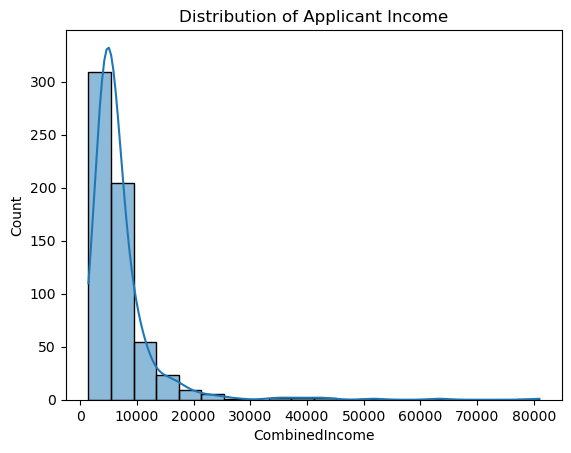

In [59]:
# Check the spread
sns.histplot(dataset['CombinedIncome'], bins=20, kde=True)
plt.title('Distribution of Applicant Income')
plt.show()

# Analysis
The data is still very skewed to the right.Let me check if standardization will help with standardizing the data 

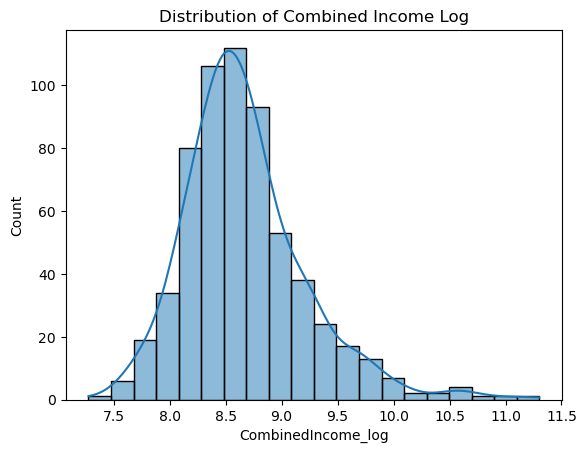

In [60]:
#Standardizing Applicant Income
dataset['CombinedIncome_log'] = np.log1p(dataset['CombinedIncome'])

# Check the spread
sns.histplot(dataset['CombinedIncome_log'], bins=20, kde=True)
plt.title('Distribution of Combined Income Log')
plt.show()

In [61]:
stat, p = shapiro(dataset['CombinedIncome_log'])
print(f'Shapiro-Wilk Test Statistic: {stat}, P-value: {p}')

if p > 0.05:
    print("Likely normal (fail to reject H₀)")
else:
    print("Not normal (reject H₀)")

Shapiro-Wilk Test Statistic: 0.9443727135658264, P-value: 2.082404412209922e-14
Not normal (reject H₀)


# Analysis
The distribution of the combined data is not yet normal. 

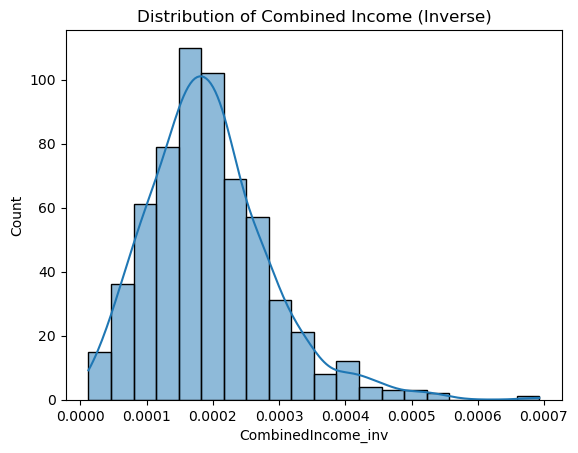

Shapiro-Wilk Test Statistic: 0.9552820324897766, P-value: 1.0613282171514915e-12


In [62]:
dataset['CombinedIncome_inv'] = 1 / (dataset['CombinedIncome'] + 1)  # Add 1 to avoid division by zero
sns.histplot(dataset['CombinedIncome_inv'], bins=20, kde=True)
plt.title('Distribution of Combined Income (Inverse)')
plt.show()

# Re-run the Shapiro-Wilk test
stat, p = shapiro(dataset['CombinedIncome_inv'])
print(f'Shapiro-Wilk Test Statistic: {stat}, P-value: {p}')


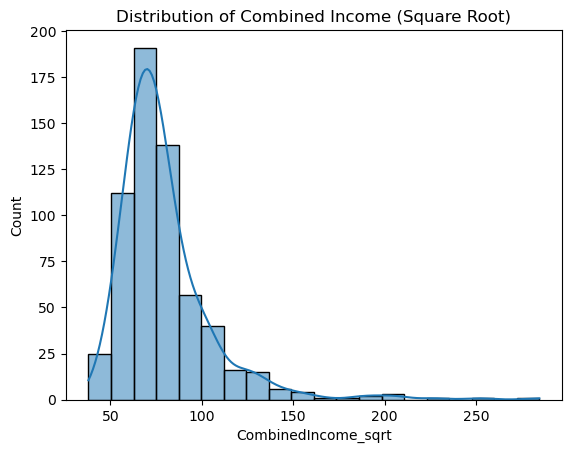

Shapiro-Wilk Test Statistic: 0.7756202220916748, P-value: 3.750859548407187e-28


In [63]:
dataset['CombinedIncome_sqrt'] = np.sqrt(dataset['CombinedIncome'] + 1)  # Add 1 to avoid sqrt(0)
sns.histplot(dataset['CombinedIncome_sqrt'], bins=20, kde=True)
plt.title('Distribution of Combined Income (Square Root)')
plt.show()

# Re-run the Shapiro-Wilk test
stat, p = shapiro(dataset['CombinedIncome_sqrt'])
print(f'Shapiro-Wilk Test Statistic: {stat}, P-value: {p}')


# Analysis
Even after trying extra complicated data, the distribution is still skewed. 
In version two, I will try something different. I will try binning and splitting the data into meaningful bins. 

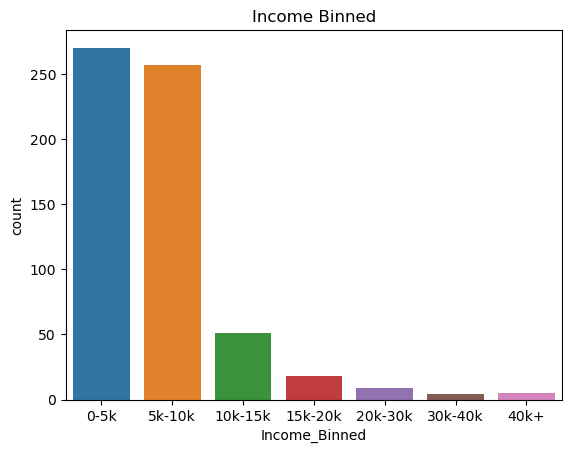

In [64]:
# Create income bins
bins = [0, 5000, 10000, 15000, 20000, 30000, 40000, np.inf]
labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-30k', '30k-40k', '40k+']
dataset['Income_Binned'] = pd.cut(dataset['CombinedIncome'], bins=bins, labels=labels)

# Check the distribution of the binned data
sns.countplot(x=dataset['Income_Binned'])
plt.title('Income Binned')
plt.show()


# Analysis
A lot of my data is in the first two bins. This makes sense because the rest are actually outliers. This is good insight. 

Loan_Status     0    1  Total  Approval_Rate
Income_Binned                               
0-5k           89  181    270       0.670370
5k-10k         74  183    257       0.712062
10k-15k        15   36     51       0.705882
15k-20k         5   13     18       0.722222
20k-30k         5    4      9       0.444444
30k-40k         2    2      4       0.500000
40k+            2    3      5       0.600000


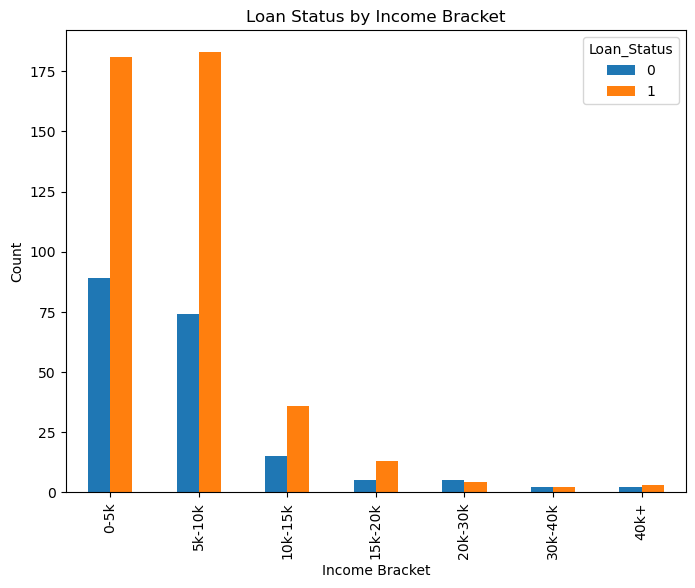

Income_Binned
0-5k       0.670370
5k-10k     0.712062
10k-15k    0.705882
15k-20k    0.722222
20k-30k    0.444444
30k-40k    0.500000
40k+       0.600000
Name: Approval_Rate, dtype: float64


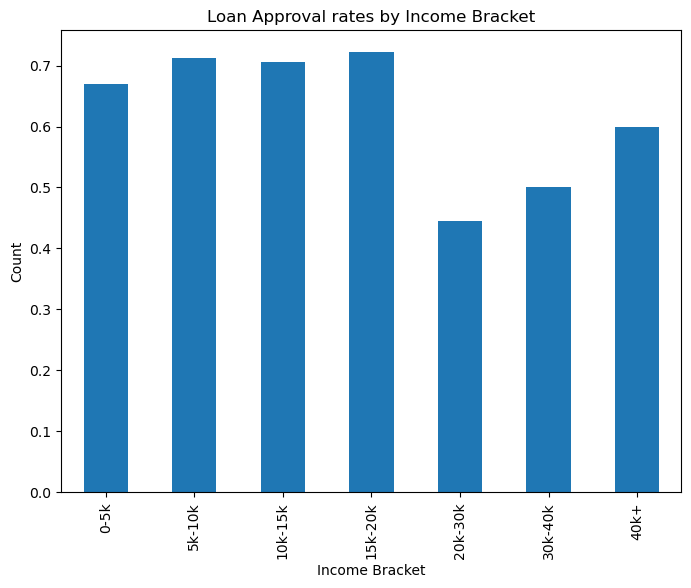

In [65]:
# Cross-tabulation of Loan_Status and Income_Binned
contingency_table = pd.crosstab(dataset['Income_Binned'], dataset['Loan_Status'])

# Calculate the approval rate for each income bin
contingency_table['Total'] = (contingency_table[0] + contingency_table[1])
contingency_table['Approval_Rate'] = contingency_table[1] / contingency_table['Total']

# Print the contingency table with approval rate
print(contingency_table)

to_graph = contingency_table.iloc[:,:2]
# Visualize this with a stacked bar chart
to_graph.plot(kind='bar', stacked=False, figsize=(8,6))
plt.title('Loan Status by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Count')
plt.show()

#Show Loan Approval Rates
loan_approval_rates = contingency_table.iloc[:, 3]
print(loan_approval_rates)
loan_approval_rates.plot(kind='bar', stacked=False, figsize=(8,6))
plt.title('Loan Approval rates by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Count')
plt.show()

# Analysis
From this, what is clear is that as long as you have money, you have a chance of getting a loan. 
This means that what I need to check for is not the amount they get, but whether they, or their partner, have a loan. 
However, everyone seems to have income. So lets do a bit more review. 


In [66]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,ApplicantIncome_boxcox,ApplicantIncome_yeojohnson,ApplicantIncome_inv,ApplicantIncome_combined,ApplicantIncome_squared,CombinedIncome,CombinedIncome_log,CombinedIncome_inv,CombinedIncome_sqrt,Income_Binned
0,LP001002,Male,No,0,1,0,5849,0.0,NaN,360.0,...,5.768597,0.544331,0.000171,2.945199,34210801,5849.0,8.674197,0.000171,76.485293,5k-10k
1,LP001003,Male,Yes,1,1,0,4583,1508.0,128.0,360.0,...,5.666179,0.170974,0.000218,2.903503,21003889,6091.0,8.714732,0.000164,78.051265,5k-10k
2,LP001005,Male,Yes,0,1,1,3000,0.0,66.0,360.0,...,5.482132,-0.499955,0.000333,2.829611,9000000,3000.0,8.006701,0.000333,54.781384,0-5k
3,LP001006,Male,Yes,0,0,0,2583,2358.0,120.0,360.0,...,5.415221,-0.743873,0.000387,2.803051,6671889,4941.0,8.505525,0.000202,70.299360,0-5k
4,LP001008,Male,No,0,1,0,6000,0.0,141.0,360.0,...,5.779154,0.582817,0.000167,2.949522,36000000,6000.0,8.699681,0.000167,77.466122,5k-10k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,1,0,2900,0.0,71.0,360.0,...,5.467063,-0.554885,0.000345,2.823617,8410000,2900.0,7.972811,0.000345,53.860932,0-5k
610,LP002979,Male,Yes,3+,1,0,4106,0.0,40.0,180.0,...,5.619198,-0.000290,0.000243,2.884519,16859236,4106.0,8.320448,0.000243,64.085880,0-5k
611,LP002983,Male,Yes,1,1,0,8072,240.0,253.0,360.0,...,5.900037,1.023487,0.000124,2.999380,65157184,8312.0,9.025576,0.000120,91.175655,5k-10k
612,LP002984,Male,Yes,2,1,0,7583,0.0,187.0,360.0,...,5.874872,0.931750,0.000132,2.988946,57501889,7583.0,8.933796,0.000132,87.086164,5k-10k


In [67]:
a = 0
for data in dataset['CoapplicantIncome']:
    if data == 0:
        a+=1
print(f'There are {a} values that are zero')

There are 273 values that are zero


In [68]:
## New column 1
ApplicantIncome_binary=[]
value=0
for data in dataset['ApplicantIncome']:
    if data == 0:
        value = 0
    elif data>0:
        value =1
    else:
        print("There is a weird value in the data")
    ApplicantIncome_binary.append(value)
dataset['ApplicantIncome_binary'] = ApplicantIncome_binary
dataset   

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,ApplicantIncome_yeojohnson,ApplicantIncome_inv,ApplicantIncome_combined,ApplicantIncome_squared,CombinedIncome,CombinedIncome_log,CombinedIncome_inv,CombinedIncome_sqrt,Income_Binned,ApplicantIncome_binary
0,LP001002,Male,No,0,1,0,5849,0.0,NaN,360.0,...,0.544331,0.000171,2.945199,34210801,5849.0,8.674197,0.000171,76.485293,5k-10k,1
1,LP001003,Male,Yes,1,1,0,4583,1508.0,128.0,360.0,...,0.170974,0.000218,2.903503,21003889,6091.0,8.714732,0.000164,78.051265,5k-10k,1
2,LP001005,Male,Yes,0,1,1,3000,0.0,66.0,360.0,...,-0.499955,0.000333,2.829611,9000000,3000.0,8.006701,0.000333,54.781384,0-5k,1
3,LP001006,Male,Yes,0,0,0,2583,2358.0,120.0,360.0,...,-0.743873,0.000387,2.803051,6671889,4941.0,8.505525,0.000202,70.299360,0-5k,1
4,LP001008,Male,No,0,1,0,6000,0.0,141.0,360.0,...,0.582817,0.000167,2.949522,36000000,6000.0,8.699681,0.000167,77.466122,5k-10k,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,1,0,2900,0.0,71.0,360.0,...,-0.554885,0.000345,2.823617,8410000,2900.0,7.972811,0.000345,53.860932,0-5k,1
610,LP002979,Male,Yes,3+,1,0,4106,0.0,40.0,180.0,...,-0.000290,0.000243,2.884519,16859236,4106.0,8.320448,0.000243,64.085880,0-5k,1
611,LP002983,Male,Yes,1,1,0,8072,240.0,253.0,360.0,...,1.023487,0.000124,2.999380,65157184,8312.0,9.025576,0.000120,91.175655,5k-10k,1
612,LP002984,Male,Yes,2,1,0,7583,0.0,187.0,360.0,...,0.931750,0.000132,2.988946,57501889,7583.0,8.933796,0.000132,87.086164,5k-10k,1


In [69]:
# New Column Two
CoApplicantIncome_binary=[]
value=0
for data in dataset['CoapplicantIncome']:
    if data == 0:
        value = 0
    elif data>0:
        value =1
    else:
        print("There is a weird value in the data")
    CoApplicantIncome_binary.append(value)
dataset['CoApplicantIncome_binary'] = CoApplicantIncome_binary
dataset   

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,ApplicantIncome_inv,ApplicantIncome_combined,ApplicantIncome_squared,CombinedIncome,CombinedIncome_log,CombinedIncome_inv,CombinedIncome_sqrt,Income_Binned,ApplicantIncome_binary,CoApplicantIncome_binary
0,LP001002,Male,No,0,1,0,5849,0.0,NaN,360.0,...,0.000171,2.945199,34210801,5849.0,8.674197,0.000171,76.485293,5k-10k,1,0
1,LP001003,Male,Yes,1,1,0,4583,1508.0,128.0,360.0,...,0.000218,2.903503,21003889,6091.0,8.714732,0.000164,78.051265,5k-10k,1,1
2,LP001005,Male,Yes,0,1,1,3000,0.0,66.0,360.0,...,0.000333,2.829611,9000000,3000.0,8.006701,0.000333,54.781384,0-5k,1,0
3,LP001006,Male,Yes,0,0,0,2583,2358.0,120.0,360.0,...,0.000387,2.803051,6671889,4941.0,8.505525,0.000202,70.299360,0-5k,1,1
4,LP001008,Male,No,0,1,0,6000,0.0,141.0,360.0,...,0.000167,2.949522,36000000,6000.0,8.699681,0.000167,77.466122,5k-10k,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,1,0,2900,0.0,71.0,360.0,...,0.000345,2.823617,8410000,2900.0,7.972811,0.000345,53.860932,0-5k,1,0
610,LP002979,Male,Yes,3+,1,0,4106,0.0,40.0,180.0,...,0.000243,2.884519,16859236,4106.0,8.320448,0.000243,64.085880,0-5k,1,0
611,LP002983,Male,Yes,1,1,0,8072,240.0,253.0,360.0,...,0.000124,2.999380,65157184,8312.0,9.025576,0.000120,91.175655,5k-10k,1,1
612,LP002984,Male,Yes,2,1,0,7583,0.0,187.0,360.0,...,0.000132,2.988946,57501889,7583.0,8.933796,0.000132,87.086164,5k-10k,1,0


In [70]:
# Create a contingency table
contingency_table = pd.crosstab(dataset['ApplicantIncome_binary'], dataset['Loan_Status'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()  # Total sample size
if n * (min(contingency_table.shape) - 1) == 0:
    cramer_v = np.nan  # or some other handling method
else:
    cramer_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Cramér's V: {cramer_v}")
print(f"Chi2 Statistic: {chi2}, P-value: {p_value}")

Cramér's V: nan
Chi2 Statistic: 0.0, P-value: 1.0


In [71]:
# Create contingency table
contingency_table = pd.crosstab(dataset['CoApplicantIncome_binary'], dataset['Loan_Status'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Total sample size
n = contingency_table.sum().sum()  

# Avoid division by zero
if n == 0 or (min(contingency_table.shape) - 1) == 0:
    cramer_v = np.nan  
else:
    cramer_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Print results
print(f"Cramér's V: {cramer_v}")
print(f"Chi2 Statistic: {chi2}, P-value: {p_value}")

Cramér's V: 0.07162998306700398
Chi2 Statistic: 3.1503446471460754, P-value: 0.07591092807837792


# Analysis
What is clear is that for someone to get a loan, they have to have an income. They need an income actually. 
However, someone has a better chance if they have a co-applicant with income. 
While the p_value is above 0.05, the closeness is too close to ignore, which is why this variable must be included. 

# Loan amount 
I want to check out how loan amount impacts someone's ability to get a loan. 
That is what I want to take care of next. 

# edit
Upon analysis of the Metadata, I have realized that the Loan_amount is in thousands. I would like to make that change and re-do my analysis. 



In [72]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,ApplicantIncome_inv,ApplicantIncome_combined,ApplicantIncome_squared,CombinedIncome,CombinedIncome_log,CombinedIncome_inv,CombinedIncome_sqrt,Income_Binned,ApplicantIncome_binary,CoApplicantIncome_binary
0,LP001002,Male,No,0,1,0,5849,0.0,NaN,360.0,...,0.000171,2.945199,34210801,5849.0,8.674197,0.000171,76.485293,5k-10k,1,0
1,LP001003,Male,Yes,1,1,0,4583,1508.0,128.0,360.0,...,0.000218,2.903503,21003889,6091.0,8.714732,0.000164,78.051265,5k-10k,1,1
2,LP001005,Male,Yes,0,1,1,3000,0.0,66.0,360.0,...,0.000333,2.829611,9000000,3000.0,8.006701,0.000333,54.781384,0-5k,1,0
3,LP001006,Male,Yes,0,0,0,2583,2358.0,120.0,360.0,...,0.000387,2.803051,6671889,4941.0,8.505525,0.000202,70.299360,0-5k,1,1
4,LP001008,Male,No,0,1,0,6000,0.0,141.0,360.0,...,0.000167,2.949522,36000000,6000.0,8.699681,0.000167,77.466122,5k-10k,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,1,0,2900,0.0,71.0,360.0,...,0.000345,2.823617,8410000,2900.0,7.972811,0.000345,53.860932,0-5k,1,0
610,LP002979,Male,Yes,3+,1,0,4106,0.0,40.0,180.0,...,0.000243,2.884519,16859236,4106.0,8.320448,0.000243,64.085880,0-5k,1,0
611,LP002983,Male,Yes,1,1,0,8072,240.0,253.0,360.0,...,0.000124,2.999380,65157184,8312.0,9.025576,0.000120,91.175655,5k-10k,1,1
612,LP002984,Male,Yes,2,1,0,7583,0.0,187.0,360.0,...,0.000132,2.988946,57501889,7583.0,8.933796,0.000132,87.086164,5k-10k,1,0


In [73]:
print(dataset['LoanAmount'].isnull().sum())

22


In [74]:
LoanAmount_binary=[]
value=0
for data in dataset['LoanAmount']:
    if data == 0:
        value = 0
    elif pd.isna(data):
        value = 0
    elif data>0:
        value =1
    else:
        print(f"There is a weird value in the data.")
    LoanAmount_binary.append(value)

dataset['LoanAmount_binary'] = LoanAmount_binary
dataset   


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,ApplicantIncome_combined,ApplicantIncome_squared,CombinedIncome,CombinedIncome_log,CombinedIncome_inv,CombinedIncome_sqrt,Income_Binned,ApplicantIncome_binary,CoApplicantIncome_binary,LoanAmount_binary
0,LP001002,Male,No,0,1,0,5849,0.0,NaN,360.0,...,2.945199,34210801,5849.0,8.674197,0.000171,76.485293,5k-10k,1,0,0
1,LP001003,Male,Yes,1,1,0,4583,1508.0,128.0,360.0,...,2.903503,21003889,6091.0,8.714732,0.000164,78.051265,5k-10k,1,1,1
2,LP001005,Male,Yes,0,1,1,3000,0.0,66.0,360.0,...,2.829611,9000000,3000.0,8.006701,0.000333,54.781384,0-5k,1,0,1
3,LP001006,Male,Yes,0,0,0,2583,2358.0,120.0,360.0,...,2.803051,6671889,4941.0,8.505525,0.000202,70.299360,0-5k,1,1,1
4,LP001008,Male,No,0,1,0,6000,0.0,141.0,360.0,...,2.949522,36000000,6000.0,8.699681,0.000167,77.466122,5k-10k,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,1,0,2900,0.0,71.0,360.0,...,2.823617,8410000,2900.0,7.972811,0.000345,53.860932,0-5k,1,0,1
610,LP002979,Male,Yes,3+,1,0,4106,0.0,40.0,180.0,...,2.884519,16859236,4106.0,8.320448,0.000243,64.085880,0-5k,1,0,1
611,LP002983,Male,Yes,1,1,0,8072,240.0,253.0,360.0,...,2.999380,65157184,8312.0,9.025576,0.000120,91.175655,5k-10k,1,1,1
612,LP002984,Male,Yes,2,1,0,7583,0.0,187.0,360.0,...,2.988946,57501889,7583.0,8.933796,0.000132,87.086164,5k-10k,1,0,1


In [75]:
# Create a contingency table
contingency_table = pd.crosstab(dataset['LoanAmount_binary'], dataset['Loan_Status'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()  # Total sample size
if n * (min(contingency_table.shape) - 1) == 0:
    cramer_v = np.nan  # or some other handling method
else:
    cramer_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Cramér's V: {cramer_v}")
print(f"Chi2 Statistic: {chi2}, P-value: {p_value}")

Cramér's V: 0.06843218848311412
Chi2 Statistic: 2.875340154241313, P-value: 0.08994596780185615


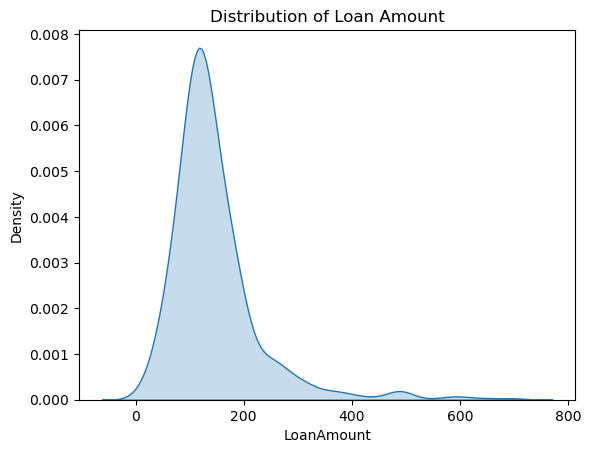

In [76]:
# Graphical representation of Loan Amount
sns.kdeplot(dataset['LoanAmount'], fill=True)  # fill=True makes it a shaded KDE
plt.title('Distribution of Loan Amount')
plt.show()


In [77]:
#Checking the Outliers
# Calculate Q1, Q3, and IQR
Q1 = dataset['LoanAmount'].quantile(0.25)
Q3 = dataset['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR
print("Upper bound:", upper_bound)
# Filter and display outlier values
outliers = dataset[dataset['LoanAmount'] > upper_bound]
print("Number of Outliers:", len(outliers))
outliers

Upper bound: 270.0
Number of Outliers: 39


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,ApplicantIncome_combined,ApplicantIncome_squared,CombinedIncome,CombinedIncome_log,CombinedIncome_inv,CombinedIncome_sqrt,Income_Binned,ApplicantIncome_binary,CoApplicantIncome_binary,LoanAmount_binary
9,LP001020,Male,Yes,1,1,0,12841,10968.0,349.0,360.0,...,3.075789,164891281,23809.0,10.077861,0.000042,154.304893,20k-30k,1,1,1
21,LP001046,Male,Yes,1,1,0,5955,5625.0,315.0,360.0,...,2.948246,35462025,11580.0,9.357121,0.000086,107.615055,10k-15k,1,1,1
34,LP001100,Male,No,3+,1,0,12500,3000.0,320.0,360.0,...,3.071411,156250000,15500.0,9.648660,0.000065,124.503012,15k-20k,1,1,1
54,LP001186,Female,Yes,1,1,1,11500,0.0,286.0,360.0,...,3.057808,132250000,11500.0,9.350189,0.000087,107.242715,10k-15k,1,0,1
67,LP001233,Male,Yes,1,1,0,10750,0.0,312.0,360.0,...,3.046761,115562500,10750.0,9.282754,0.000093,103.687029,10k-15k,1,0,1
126,LP001448,Male,Yes,3+,1,0,23803,0.0,370.0,360.0,...,3.174525,566582809,23803.0,10.077609,0.000042,154.285450,20k-30k,1,0,1
130,LP001469,Male,No,0,1,1,20166,0.0,650.0,480.0,...,3.148302,406667556,20166.0,9.911803,0.000050,142.010563,20k-30k,1,0,1
135,LP001488,Male,Yes,3+,1,0,4000,7750.0,290.0,360.0,...,2.879983,16000000,11750.0,9.371694,0.000085,108.402030,10k-15k,1,1,1
155,LP001536,Male,Yes,3+,1,0,39999,0.0,600.0,180.0,...,3.255247,1599920001,39999.0,10.596635,0.000025,200.000000,30k-40k,1,0,1
161,LP001562,Male,Yes,0,1,0,7933,0.0,275.0,360.0,...,2.996483,62932489,7933.0,8.978913,0.000126,89.073004,5k-10k,1,0,1


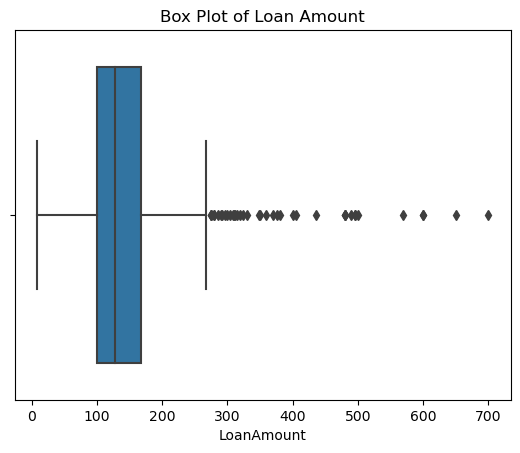

In [78]:
sns.boxplot(x=dataset['LoanAmount'])
plt.title('Box Plot of Loan Amount')
plt.show()

# Analysis
The data is skewed to the right. This shows that the median would be better to use. The mean would be heavily influenced by the outliers. 

In [79]:
#Fill In the Missing Data. 
dataset['LoanAmount'] = dataset['LoanAmount'].fillna(dataset['LoanAmount'].median())


In [80]:
dataset['LoanAmount'] = dataset['LoanAmount']*1000

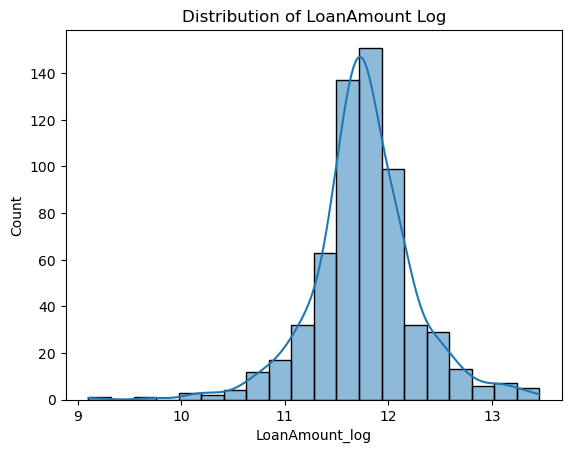

In [81]:
#Standardizing the Loan Amount Data
dataset['LoanAmount_log'] = np.log1p(dataset['LoanAmount'])

# Check the spread
sns.histplot(dataset['LoanAmount_log'], bins=20, kde=True)
plt.title('Distribution of LoanAmount Log')
plt.show()

In [82]:
stat, p = shapiro(dataset['LoanAmount_log'])
print(f'Shapiro-Wilk Test Statistic: {stat}, P-value: {p}')

if p > 0.05:
    print("Likely normal (fail to reject H₀)")
else:
    print("Not normal (reject H₀)")

Shapiro-Wilk Test Statistic: 0.9580186605453491, P-value: 3.143611456216111e-12
Not normal (reject H₀)


In [83]:
# Separate the data into two groups based on Loan_Status
group1 = dataset[dataset['Loan_Status'] == 0]['LoanAmount']
group2 = dataset[dataset['Loan_Status'] == 1]['LoanAmount']

# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(group1, group2)

# Output the results
print(f"Mann-Whitney U test statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the p-value
if p_value > 0.05:
    print("Fail to reject the null hypothesis. No significant difference between the groups.")
else:
    print("Reject the null hypothesis. There is a significant difference between the groups.")


Mann-Whitney U test statistic: 42236.0
P-value: 0.3976062007405521
Fail to reject the null hypothesis. No significant difference between the groups.


# Analysis
Now, normalizing the data is becoming hard. 
The Manny-Whitney U-test also shows no relation. This means that there is no relation. 
However, what if not having a loan amount has an impact on the chances of getting a loan?
Or what if the loan amount should be a certain percent of the loan amount? Many banks and loaning companies often consider the loan amount in relation to the amount in the person's income to know if they can approve it. It speaks to the person's ability to pay.
So now I have to create two new columns. 

# Further Analysis

I changed the order so I can investigate the impact on loanamount. It seems that the loan amount impacts the chances of someone getting a loan. 
While the p_value is slightly higher than 0.08, it shows that there might be a link in connection between whether there truly is a Loan Amount and the approval of the Loan. 

In [84]:
dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,ApplicantIncome_squared,CombinedIncome,CombinedIncome_log,CombinedIncome_inv,CombinedIncome_sqrt,Income_Binned,ApplicantIncome_binary,CoApplicantIncome_binary,LoanAmount_binary,LoanAmount_log
0,LP001002,Male,No,0,1,0,5849,0.0,128000.0,360.0,...,34210801,5849.0,8.674197,0.000171,76.485293,5k-10k,1,0,0,11.759793
1,LP001003,Male,Yes,1,1,0,4583,1508.0,128000.0,360.0,...,21003889,6091.0,8.714732,0.000164,78.051265,5k-10k,1,1,1,11.759793
2,LP001005,Male,Yes,0,1,1,3000,0.0,66000.0,360.0,...,9000000,3000.0,8.006701,0.000333,54.781384,0-5k,1,0,1,11.097425
3,LP001006,Male,Yes,0,0,0,2583,2358.0,120000.0,360.0,...,6671889,4941.0,8.505525,0.000202,70.299360,0-5k,1,1,1,11.695255
4,LP001008,Male,No,0,1,0,6000,0.0,141000.0,360.0,...,36000000,6000.0,8.699681,0.000167,77.466122,5k-10k,1,0,1,11.856522


In [85]:
# Get the percentage of Income in relation to the Loan Amount
LoanAmount_To_ApplicantIncome_percentage=[]
for loan, income in zip(dataset['LoanAmount'], dataset['ApplicantIncome']):
    percentage = (loan / income) * 100  # Example calculation
    LoanAmount_To_ApplicantIncome_percentage.append(round(percentage, 2))

dataset['LoanAmount_To_ApplicantIncome_percentage'] = LoanAmount_To_ApplicantIncome_percentage
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,CombinedIncome,CombinedIncome_log,CombinedIncome_inv,CombinedIncome_sqrt,Income_Binned,ApplicantIncome_binary,CoApplicantIncome_binary,LoanAmount_binary,LoanAmount_log,LoanAmount_To_ApplicantIncome_percentage
0,LP001002,Male,No,0,1,0,5849,0.0,128000.0,360.0,...,5849.0,8.674197,0.000171,76.485293,5k-10k,1,0,0,11.759793,2188.41
1,LP001003,Male,Yes,1,1,0,4583,1508.0,128000.0,360.0,...,6091.0,8.714732,0.000164,78.051265,5k-10k,1,1,1,11.759793,2792.93
2,LP001005,Male,Yes,0,1,1,3000,0.0,66000.0,360.0,...,3000.0,8.006701,0.000333,54.781384,0-5k,1,0,1,11.097425,2200.00
3,LP001006,Male,Yes,0,0,0,2583,2358.0,120000.0,360.0,...,4941.0,8.505525,0.000202,70.299360,0-5k,1,1,1,11.695255,4645.76
4,LP001008,Male,No,0,1,0,6000,0.0,141000.0,360.0,...,6000.0,8.699681,0.000167,77.466122,5k-10k,1,0,1,11.856522,2350.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,1,0,2900,0.0,71000.0,360.0,...,2900.0,7.972811,0.000345,53.860932,0-5k,1,0,1,11.170449,2448.28
610,LP002979,Male,Yes,3+,1,0,4106,0.0,40000.0,180.0,...,4106.0,8.320448,0.000243,64.085880,0-5k,1,0,1,10.596660,974.18
611,LP002983,Male,Yes,1,1,0,8072,240.0,253000.0,360.0,...,8312.0,9.025576,0.000120,91.175655,5k-10k,1,1,1,12.441149,3134.29
612,LP002984,Male,Yes,2,1,0,7583,0.0,187000.0,360.0,...,7583.0,8.933796,0.000132,87.086164,5k-10k,1,0,1,12.138869,2466.04


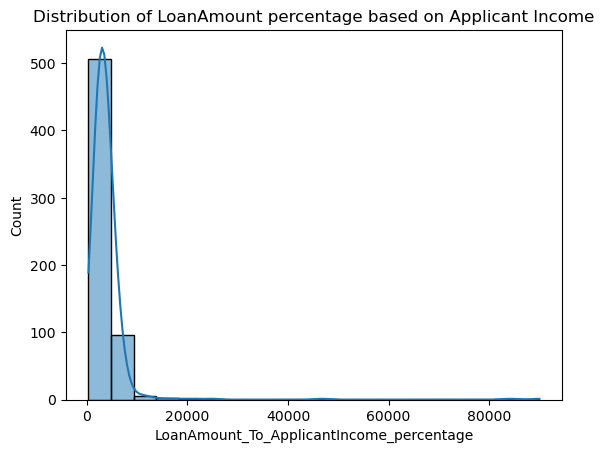

In [86]:
# Check the spread
sns.histplot(dataset['LoanAmount_To_ApplicantIncome_percentage'], bins=20, kde=True)
plt.title('Distribution of LoanAmount percentage based on Applicant Income')
plt.show()

In [87]:
# Defining Outliers. 
# Calculate Q1, Q3, and IQR
Q1 = dataset['LoanAmount_To_ApplicantIncome_percentage'].quantile(0.25)
Q3 = dataset['LoanAmount_To_ApplicantIncome_percentage'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR
print("Upper bound:", upper_bound)
# Filter and display outlier values
outliers = dataset[dataset['LoanAmount_To_ApplicantIncome_percentage'] > upper_bound]
loan_percentage_without_outliers = dataset[dataset['LoanAmount_To_ApplicantIncome_percentage'] < upper_bound]
print("Number of Outliers:", len(outliers))

Upper bound: 7157.976249999999
Number of Outliers: 21


# Analysis
Many of the people are taking loans between 1 and 7.17% of their income, with a 21 outliers going against the mould. I can use the dataset without the outliers to understand the relationship properly. 

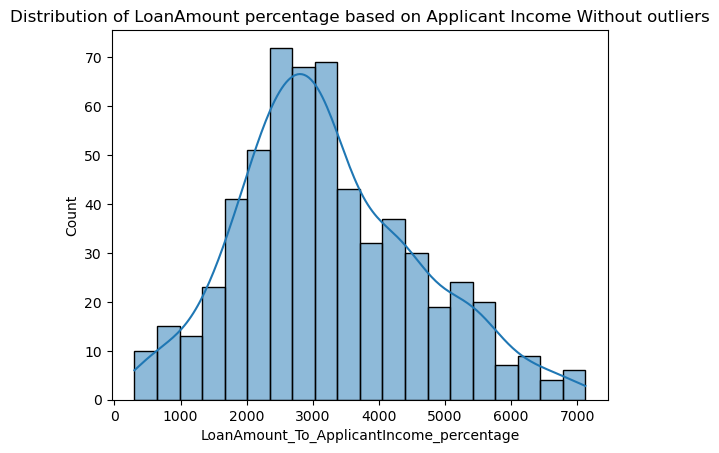

In [88]:
# Check the spread
sns.histplot(loan_percentage_without_outliers['LoanAmount_To_ApplicantIncome_percentage'], bins=20, kde=True)
plt.title('Distribution of LoanAmount percentage based on Applicant Income Without outliers')
plt.show()

In [89]:
stat, p = shapiro(loan_percentage_without_outliers['LoanAmount_To_ApplicantIncome_percentage'])
print(f'Shapiro-Wilk Test Statistic: {stat}, P-value: {p}')

if p > 0.05:
    print("Likely normal (fail to reject H₀)")
else:
    print("Not normal (reject H₀)")

Shapiro-Wilk Test Statistic: 0.980941116809845, P-value: 5.482274332280213e-07
Not normal (reject H₀)


# Analysis
Without the outliers, the data looks well spread, even though it is not normal. If I standardize with log, I believe it can be normal. Let me wait and see. 

In [90]:
#standardizing
loan_percentage_without_outliers['LoanAmount_To_ApplicantIncome_percentage_standardized'] = np.log1p(loan_percentage_without_outliers['LoanAmount_To_ApplicantIncome_percentage'])

/tmp/ipykernel_7192/3879060382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_percentage_without_outliers['LoanAmount_To_ApplicantIncome_percentage_standardized'] = np.log1p(loan_percentage_without_outliers['LoanAmount_To_ApplicantIncome_percentage'])


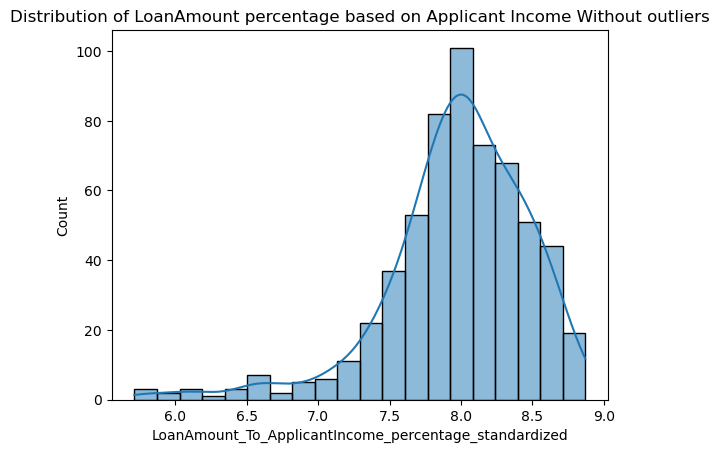

In [91]:
# Check the spread
sns.histplot(loan_percentage_without_outliers['LoanAmount_To_ApplicantIncome_percentage_standardized'], bins=20, kde=True)
plt.title('Distribution of LoanAmount percentage based on Applicant Income Without outliers')
plt.show()

In [92]:
stat, p = shapiro(loan_percentage_without_outliers['LoanAmount_To_ApplicantIncome_percentage_standardized'])
print(f'Shapiro-Wilk Test Statistic: {stat}, P-value: {p}')

if p > 0.05:
    print("Likely normal (fail to reject H₀)")
else:
    print("Not normal (reject H₀)")

Shapiro-Wilk Test Statistic: 0.920894205570221, P-value: 4.3675655812224545e-17
Not normal (reject H₀)


In [93]:
from scipy.stats import ttest_ind

# Splitting the numeric variable into two groups based on categories
group1 = loan_percentage_without_outliers['LoanAmount_To_ApplicantIncome_percentage_standardized'][loan_percentage_without_outliers['Loan_Status'] == 0]
group2 = loan_percentage_without_outliers['LoanAmount_To_ApplicantIncome_percentage_standardized'][loan_percentage_without_outliers['Loan_Status'] == 1]

# Performing t-test
stat, p = ttest_ind(group1, group2, equal_var=False)  # Set equal_var=False if variances are unequal

print(f'T-test Statistic: {stat}, P-value: {p}')

if p < 0.05:
    print("Significant relationship (Reject H₀: means are the same)")
else:
    print("No significant relationship (Fail to reject H₀)")


T-test Statistic: 0.1783767257678451, P-value: 0.8585247770199724
No significant relationship (Fail to reject H₀)


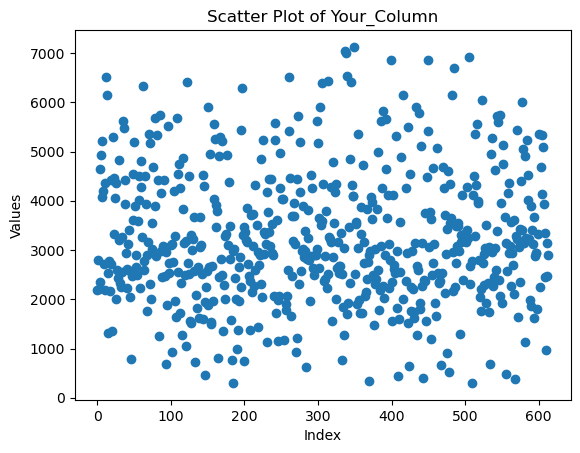

In [94]:
plt.scatter(loan_percentage_without_outliers.index, loan_percentage_without_outliers['LoanAmount_To_ApplicantIncome_percentage'])
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Scatter Plot of Your_Column")
plt.show()

## Analysis
Even after standardization, the data is still not normal. However, it seems the amount percentage is not a factor considered. 
The data is also too scattered. There are also no meaningful clustersaside from the fact that a majority of the values lie from 1 tp 4%. However, there is clearly no relation. 
I would be interested to see how the outliers behave in this instance. 

In [95]:
outliers

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,CombinedIncome,CombinedIncome_log,CombinedIncome_inv,CombinedIncome_sqrt,Income_Binned,ApplicantIncome_binary,CoApplicantIncome_binary,LoanAmount_binary,LoanAmount_log,LoanAmount_To_ApplicantIncome_percentage
77,LP001259,Male,Yes,1,1,1,1000,3022.0,110000.0,360.0,...,4022.0,8.299783,0.000249,63.427124,0-5k,1,1,1,11.608245,11000.00
82,LP001267,Female,Yes,2,1,0,1378,1881.0,167000.0,360.0,...,3259.0,8.089482,0.000307,57.096410,0-5k,1,1,1,12.025755,12119.01
99,LP001343,Male,Yes,0,1,0,1759,3541.0,131000.0,360.0,...,5300.0,8.575651,0.000189,72.807967,5k-10k,1,1,1,11.782960,7447.41
135,LP001488,Male,Yes,3+,1,0,4000,7750.0,290000.0,360.0,...,11750.0,9.371694,0.000085,108.402030,10k-15k,1,1,1,12.577640,7250.00
177,LP001610,Male,Yes,3+,1,0,5516,11300.0,495000.0,360.0,...,16816.0,9.730146,0.000059,129.680376,15k-20k,1,1,1,13.112315,8973.89
188,LP001644,Male,Yes,0,1,1,674,5296.0,168000.0,360.0,...,5970.0,8.694670,0.000167,77.272246,5k-10k,1,1,1,12.031725,24925.82
216,LP001722,Male,Yes,0,1,0,150,1800.0,135000.0,360.0,...,1950.0,7.576097,0.000513,44.170126,0-5k,1,1,1,11.813037,90000.00
250,LP001835,Male,Yes,0,0,0,1668,3890.0,201000.0,360.0,...,5558.0,8.623174,0.000180,74.558702,5k-10k,1,1,1,12.211065,12050.36
253,LP001843,Male,Yes,1,0,0,2661,7101.0,279000.0,180.0,...,9762.0,9.186355,0.000102,98.807894,5k-10k,1,1,1,12.538971,10484.78
255,LP001846,Female,No,3+,1,0,3083,0.0,255000.0,360.0,...,3083.0,8.033983,0.000324,55.533774,0-5k,1,0,1,12.449023,8271.16


# Analsis
There are outliers within the outliers. There is one person who took a loan that makes for 84% of her income. 

# Conclusion on Loan Amount
The only factr that seems to have an impact on the loan status is whether or not there is a loan amount in the first place, the rest is simply not important. 

## Loan term analysis
The loan term is in months. 
To simplify the calculations and to ease the calculation, I would want to use years instead. That is the first step I am taking.
But first, I need to fill the missing values.

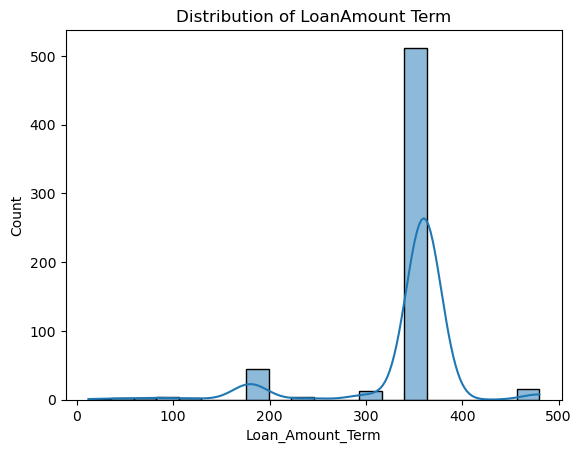

In [96]:
# Check the spread
sns.histplot(dataset['Loan_Amount_Term'], bins=20, kde=True)
plt.title('Distribution of LoanAmount Term')
plt.show()

In [97]:
#Fill Missing values
dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0])


# Convert Loan_Amount_Term from months to years
dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'] / 12
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,CombinedIncome,CombinedIncome_log,CombinedIncome_inv,CombinedIncome_sqrt,Income_Binned,ApplicantIncome_binary,CoApplicantIncome_binary,LoanAmount_binary,LoanAmount_log,LoanAmount_To_ApplicantIncome_percentage
0,LP001002,Male,No,0,1,0,5849,0.0,128000.0,30.0,...,5849.0,8.674197,0.000171,76.485293,5k-10k,1,0,0,11.759793,2188.41
1,LP001003,Male,Yes,1,1,0,4583,1508.0,128000.0,30.0,...,6091.0,8.714732,0.000164,78.051265,5k-10k,1,1,1,11.759793,2792.93
2,LP001005,Male,Yes,0,1,1,3000,0.0,66000.0,30.0,...,3000.0,8.006701,0.000333,54.781384,0-5k,1,0,1,11.097425,2200.00
3,LP001006,Male,Yes,0,0,0,2583,2358.0,120000.0,30.0,...,4941.0,8.505525,0.000202,70.299360,0-5k,1,1,1,11.695255,4645.76
4,LP001008,Male,No,0,1,0,6000,0.0,141000.0,30.0,...,6000.0,8.699681,0.000167,77.466122,5k-10k,1,0,1,11.856522,2350.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,1,0,2900,0.0,71000.0,30.0,...,2900.0,7.972811,0.000345,53.860932,0-5k,1,0,1,11.170449,2448.28
610,LP002979,Male,Yes,3+,1,0,4106,0.0,40000.0,15.0,...,4106.0,8.320448,0.000243,64.085880,0-5k,1,0,1,10.596660,974.18
611,LP002983,Male,Yes,1,1,0,8072,240.0,253000.0,30.0,...,8312.0,9.025576,0.000120,91.175655,5k-10k,1,1,1,12.441149,3134.29
612,LP002984,Male,Yes,2,1,0,7583,0.0,187000.0,30.0,...,7583.0,8.933796,0.000132,87.086164,5k-10k,1,0,1,12.138869,2466.04


In [99]:
dataset['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
30.0    526
15.0     44
40.0     15
25.0     13
20.0      4
7.0       4
10.0      3
5.0       2
3.0       2
1.0       1
Name: count, dtype: int64

# Analysis
The majority of people were asking for a loan time of 30 years. 
Another interesting tidbit is that there are a majority of people are asking for loans with an amount of 15 years.
I can create three columns: short term, medium term, and long term loans, with the acronyms: S, M, L. 
I can then check to see whether these values have a graphic impact on loan approval. 

In [100]:
## Create the S, M , L column
loan_term = []
for time in dataset['Loan_Amount_Term']:
    if time < 3:
        loan_term.append('S')
    elif time > 3 and time < 7:
        loan_term.append('M')
    else:
        loan_term.append('L')
dataset['Loan_Term_Period'] = loan_term
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,CombinedIncome_log,CombinedIncome_inv,CombinedIncome_sqrt,Income_Binned,ApplicantIncome_binary,CoApplicantIncome_binary,LoanAmount_binary,LoanAmount_log,LoanAmount_To_ApplicantIncome_percentage,Loan_Term_Period
0,LP001002,Male,No,0,1,0,5849,0.0,128000.0,30.0,...,8.674197,0.000171,76.485293,5k-10k,1,0,0,11.759793,2188.41,L
1,LP001003,Male,Yes,1,1,0,4583,1508.0,128000.0,30.0,...,8.714732,0.000164,78.051265,5k-10k,1,1,1,11.759793,2792.93,L
2,LP001005,Male,Yes,0,1,1,3000,0.0,66000.0,30.0,...,8.006701,0.000333,54.781384,0-5k,1,0,1,11.097425,2200.00,L
3,LP001006,Male,Yes,0,0,0,2583,2358.0,120000.0,30.0,...,8.505525,0.000202,70.299360,0-5k,1,1,1,11.695255,4645.76,L
4,LP001008,Male,No,0,1,0,6000,0.0,141000.0,30.0,...,8.699681,0.000167,77.466122,5k-10k,1,0,1,11.856522,2350.00,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,1,0,2900,0.0,71000.0,30.0,...,7.972811,0.000345,53.860932,0-5k,1,0,1,11.170449,2448.28,L
610,LP002979,Male,Yes,3+,1,0,4106,0.0,40000.0,15.0,...,8.320448,0.000243,64.085880,0-5k,1,0,1,10.596660,974.18,L
611,LP002983,Male,Yes,1,1,0,8072,240.0,253000.0,30.0,...,9.025576,0.000120,91.175655,5k-10k,1,1,1,12.441149,3134.29,L
612,LP002984,Male,Yes,2,1,0,7583,0.0,187000.0,30.0,...,8.933796,0.000132,87.086164,5k-10k,1,0,1,12.138869,2466.04,L


Loan_Status         0    1  Total  Approval_Rate
Loan_Term_Period                                
L                 192  419    611       0.685761
M                   0    2      2       1.000000
S                   0    1      1       1.000000


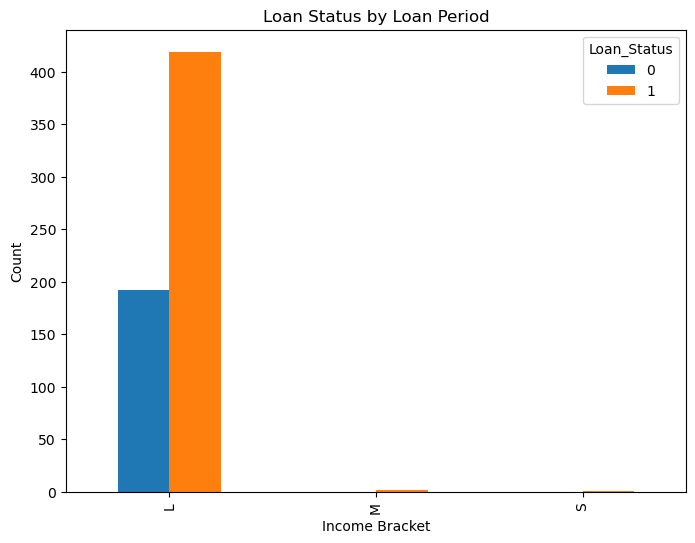

In [101]:
# Cross-tabulation of Loan_Status and Loan Time
contingency_table = pd.crosstab(dataset['Loan_Term_Period'], dataset['Loan_Status'])

# Calculate the approval rate for each income bin
contingency_table['Total'] = (contingency_table[0] + contingency_table[1])
contingency_table['Approval_Rate'] = contingency_table[1] / contingency_table['Total']

# Print the contingency table with approval rate
print(contingency_table)

to_graph = contingency_table.iloc[:,:2]
# Visualize this with a stacked bar chart
to_graph.plot(kind='bar', stacked=False, figsize=(8,6))
plt.title('Loan Status by Loan Period')
plt.xlabel('Income Bracket')
plt.ylabel('Count')
plt.show()

## Analysis
It is not possible to use this metric. There are very few short term and middle term loans for the data to actually make sense. 

Loan_Status         0    1  Total  Approval_Rate
thirty_and_above                                
0                  24   49     73       0.671233
1                 168  373    541       0.689464


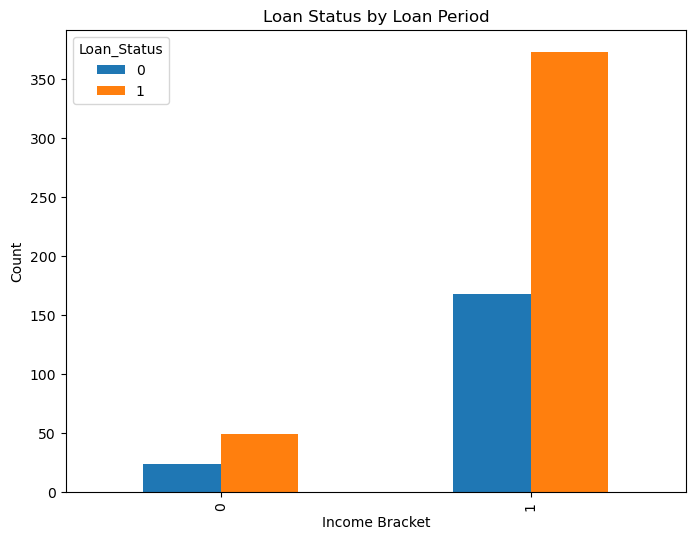

In [102]:
## Create the long term loan
thirty_and_above = []
for time in dataset['Loan_Amount_Term']:
    if time < 30:
        thirty_and_above.append(0)
    else:
        thirty_and_above.append(1)
    
dataset['thirty_and_above'] = thirty_and_above

# Cross-tabulation of Loan_Status and Loan Time
contingency_table = pd.crosstab(dataset['thirty_and_above'], dataset['Loan_Status'])

# Calculate the approval rate for each income bin
contingency_table['Total'] = (contingency_table[0] + contingency_table[1])
contingency_table['Approval_Rate'] = contingency_table[1] / contingency_table['Total']

# Print the contingency table with approval rate
print(contingency_table)

to_graph = contingency_table.iloc[:,:2]
# Visualize this with a stacked bar chart
to_graph.plot(kind='bar', stacked=False, figsize=(8,6))
plt.title('Loan Status by Loan Period')
plt.xlabel('Income Bracket')
plt.ylabel('Count')
plt.show()

## Analysis
It seems as though for this dataset, the rate approval based on loan time does not matter. The rates are the same, it is just that the data for short-term loans is small. 
However, upon research, I have learned of the concept like DTI which I would like to explore. 
DTI stands for Debt-to-Income Ratio. It is a financial metric used by lenders to assess an individual's ability to manage monthly debt payments in relation to their monthly income. A lower DTI typically indicates better financial health and a higher ability to repay debts.
A high DTI is above 50%, which would be considered hard to get an approval for loans. 
How to Interpret DTI
DTI < 36% → Healthy (good loan approval chance).
DTI 36% - 43% → Acceptable, but riskier.
DTI > 43% → High risk, loan approval is less likely.


In [103]:
#DTI uses months, so I will convert the time back to months
# Convert Loan_Amount_Term from months to years
dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'] * 12

# Note
to calculate the DTI, I need to have a sample interest in p.a. 
If I knew more about the bank, I would ask. However, in this case, it will assume that the yearly rate is 0.1 or 10%. 

In [124]:
def calculate_monthly_payment(P, annual_interest_rate, n):
    """
    Calculate the monthly loan payment based on loan amount, interest rate, and loan term.

    Parameters:
    P (float): Loan amount (in actual value, not thousands)
    annual_interest_rate (float): Annual interest rate (e.g., 0.1 for 10%)
    n (int): Loan term in months

    Returns:
    float: Monthly loan payment
    """
    # Convert annual interest rate to monthly interest rate
    r = annual_interest_rate / 12  
    
    # Avoid division by zero if interest rate is 0 (special case for zero-interest loans)
    if r == 0:
        return P / n
    
    # Loan payment formula
    M = P * (r * (1 + r)**n) / ((1 + r)**n - 1)
    return M

monthly_payment = []
for loan_amount, loan_term in zip(dataset['LoanAmount'], dataset['Loan_Amount_Term']):
    payment = calculate_monthly_payment(loan_amount, 0.1, loan_term)
    monthly_payment.append(round(payment, 2))
dataset['MonthlyPayment'] = monthly_payment
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,CoApplicantIncome_binary,LoanAmount_binary,LoanAmount_log,LoanAmount_To_ApplicantIncome_percentage,Loan_Term_Period,thirty_and_above,MonthlyPayment,DTI,DTI_Binned,Acceptable_DTI
0,LP001002,Male,No,0,1,0,5849,0.0,128000.0,360.0,...,0,0,11.759793,2188.41,L,1,1123.29,19.20,10-20,1
1,LP001003,Male,Yes,1,1,0,4583,1508.0,128000.0,360.0,...,1,1,11.759793,2792.93,L,1,1123.29,18.44,10-20,1
2,LP001005,Male,Yes,0,1,1,3000,0.0,66000.0,360.0,...,0,1,11.097425,2200.00,L,1,579.20,19.31,10-20,1
3,LP001006,Male,Yes,0,0,0,2583,2358.0,120000.0,360.0,...,1,1,11.695255,4645.76,L,1,1053.09,21.31,20-30,1
4,LP001008,Male,No,0,1,0,6000,0.0,141000.0,360.0,...,0,1,11.856522,2350.00,L,1,1237.38,20.62,20-30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,1,0,2900,0.0,71000.0,360.0,...,0,1,11.170449,2448.28,L,1,623.08,21.49,20-30,1
610,LP002979,Male,Yes,3+,1,0,4106,0.0,40000.0,180.0,...,0,1,10.596660,974.18,L,0,429.84,10.47,10-20,1
611,LP002983,Male,Yes,1,1,0,8072,240.0,253000.0,360.0,...,1,1,12.441149,3134.29,L,1,2220.26,26.71,20-30,1
612,LP002984,Male,Yes,2,1,0,7583,0.0,187000.0,360.0,...,0,1,12.138869,2466.04,L,1,1641.06,21.64,20-30,1


In [105]:
DTI = []
for monthly_payment, combined_income in zip(dataset['MonthlyPayment'], dataset['CombinedIncome']):
    DTI_value= (monthly_payment/combined_income) * 100
    DTI.append(round(DTI_value, 2))
    
dataset['DTI'] = DTI


In [125]:
high_DTI = 0
for data in dataset['DTI']:
    if data > 43:
        high_DTI += 1
max_DTI =  dataset['DTI'].max()
print(f"There are {high_DTI} people with a high DTI.\n The max DTI is {max_DTI}")

There are 13 people with a high DTI.
 The max DTI is 143.68


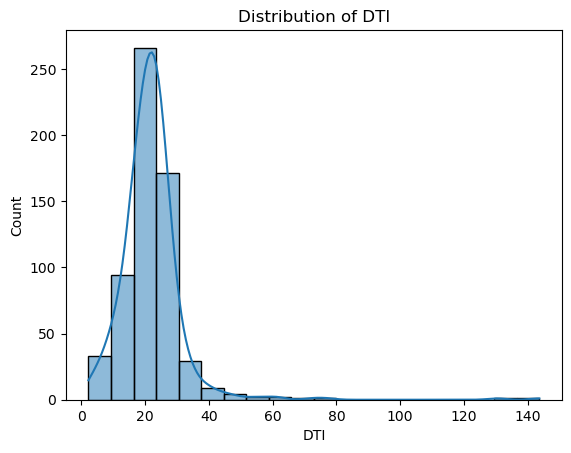

In [107]:
# Check the spread
sns.histplot(dataset['DTI'], bins=20, kde=True)
plt.title('Distribution of DTI')
plt.show()

# Analysis
Many of those being issued loans have a relatively low DTI. I would want to know the impact that DTI has on loan payment using bins. 

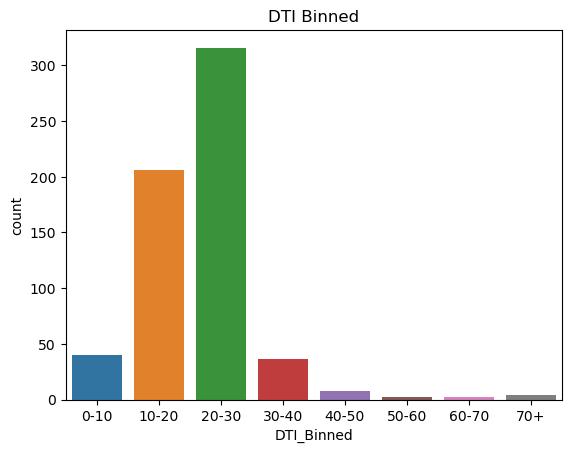

In [108]:
# Create DTI bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, np.inf]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']
dataset['DTI_Binned'] = pd.cut(dataset['DTI'], bins=bins, labels=labels)

# Check the distribution of the binned data
sns.countplot(x=dataset['DTI_Binned'])
plt.title('DTI Binned')
plt.show()

In [113]:
## Counts of bins
dataset['DTI_Binned'].value_counts()

DTI_Binned
20-30    316
10-20    206
0-10      40
30-40     36
40-50      8
70+        4
50-60      2
60-70      2
Name: count, dtype: int64

DTI_Binned
0-10     72.500000
10-20    66.019417
20-30    73.734177
30-40    50.000000
40-50    50.000000
50-60     0.000000
60-70     0.000000
70+      50.000000
Name: success_rate, dtype: float64


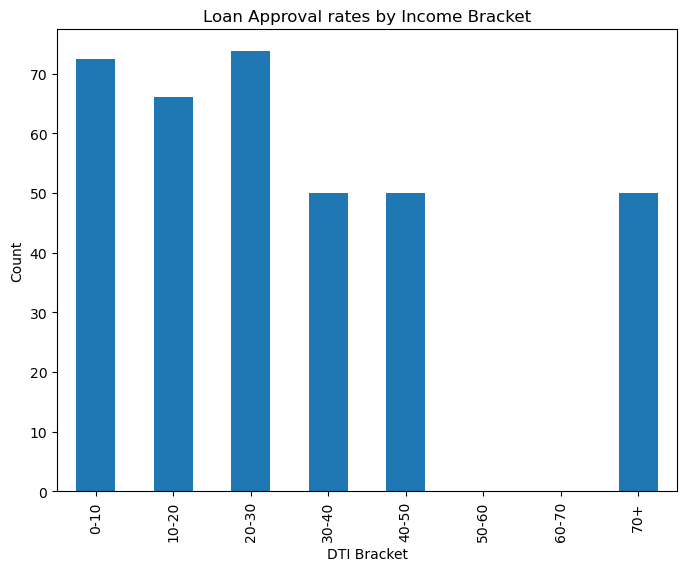

In [109]:
# Cross-tabulation of Loan_Status and Income_Binned
contingency_table = pd.crosstab(dataset['DTI_Binned'], dataset['Loan_Status'])

contingency_table['success_rate'] = contingency_table[1]/(contingency_table[0] + contingency_table[1]) * 100

#Show Loan Approval Rates
loan_approval_rates = contingency_table.iloc[:, 2]
print(loan_approval_rates)
loan_approval_rates.plot(kind='bar', stacked=False, figsize=(8,6))
plt.title('Loan Approval rates by Income Bracket')
plt.xlabel('DTI Bracket')
plt.ylabel('Count')
plt.show()

# Analysis
As expected, the higher the DTI rate, the lower the chances of loan approval. This means that DTI rate is an integral part of the algorithm and should be considered when creating it. 
The appropriate DTI should be 43% and below, which I can use to create a binary value, with the column: Acceptable_DTI

In [116]:
acceptable_DTI = []
for dti in dataset['DTI']:
    if dti < 43:
        acceptable_DTI.append(1)
    else:
        acceptable_DTI.append(0)
dataset['Acceptable_DTI'] = acceptable_DTI

# Conclusion
I will use the acceptible DTI value in the modelling phase. 

## Credit History Analysis
It is time to check whether the credit history has an impact on loan application. 
The Credit_History column represents whether an applicant has a history of repaying debts on time. It is an important factor used by lenders to determine the likelihood of loan approval.
First, I need to fill the missing values. 

In [110]:
dataset['Credit_History'].isnull().sum()

50

In [111]:
#Fill Missing Values
dataset['Credit_History'] = dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0])

Credit_History
0.0    0.078652
1.0    0.790476
Name: Loan_Status, dtype: float64


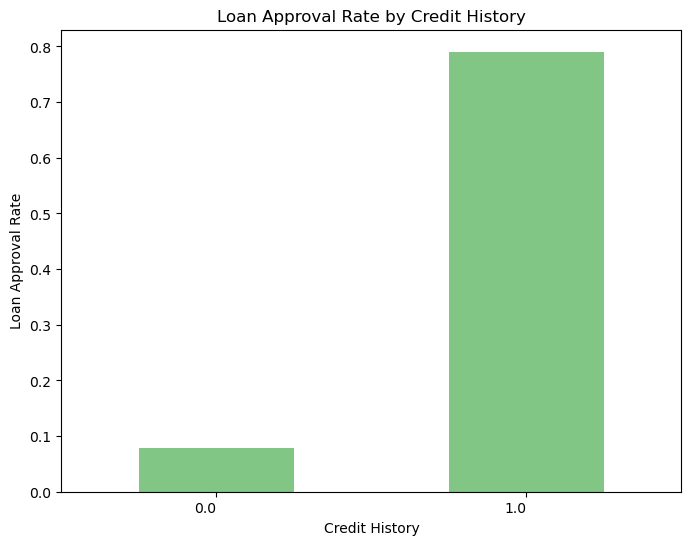

In [112]:
# # Visual representation of how whether credit history affects a person's ability to get a loan
loan_approval_rate = dataset.groupby('Credit_History')['Loan_Status'].mean()
print(loan_approval_rate)
# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
loan_approval_rate.plot(kind='bar', color=['#4CAF50'], alpha=0.7)
plt.title('Loan Approval Rate by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Loan Approval Rate')
# Adjust x-axis labels
plt.xticks(rotation=0, ha='right', fontsize=10)  # Rotate and align labels for better readability

plt.show()

# Conclusion
It is clear that those with a history of paying their loans have a higher chance of gettig their loans approved. This is an integral variable to consider. 

## Property Area Analysis
This is where I will analyze the property area and determine how impactful it is when giving loans. 

Property_Area
Rural        0.614525
Semiurban    0.768240
Urban        0.658416
Name: Loan_Status, dtype: float64


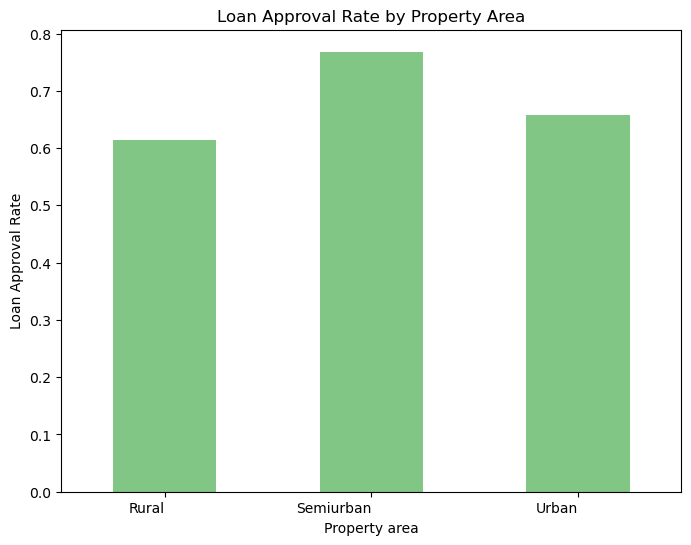

In [117]:
# # Visual representation of how whether property area affects a person's ability to get a loan
loan_approval_rate = dataset.groupby('Property_Area')['Loan_Status'].mean()
print(loan_approval_rate)
# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
loan_approval_rate.plot(kind='bar', color=['#4CAF50'], alpha=0.7)
plt.title('Loan Approval Rate by Property Area')
plt.xlabel('Property area')
plt.ylabel('Loan Approval Rate')
# Adjust x-axis labels
plt.xticks(rotation=0, ha='right', fontsize=10)  # Rotate and align labels for better readability

plt.show()

# Analysis
Those in semiurban areas have a slighty higher chance of getting a loan accorrding to this. I need to analyze more. 

In [119]:
dataset['Property_Area'].isnull().sum()

0

In [122]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(dataset["Property_Area"], dataset["Loan_Status"])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("Property Area has a significant impact on Loan Status.")
else:
    print("No significant relationship between Property Area and Loan Status.")


Chi-Square Statistic: 12.297623130485675
P-value: 0.0021360187811644937
Property Area has a significant impact on Loan Status.


## Analysis
It seems Property Area has a significance to loan approval. 
It could be that property can be used as collateral to pay of the loan. There is also higher earning for those in urban areas as compared to those in rural areas. 

# FINAL CONCLUSION
The columns I will use to make the model are:
i. Married. 
ii. Education. 
iii. Coapplicant income binary. (whether someone has a coapplicant)
iv. Loan Amount Binary (whether someone has a loan amount)
v. Acceptable_DTI
vi. Property area. 